**Necessary imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import requests

**Yahoo finance data import**

[*********************100%***********************]  1 of 1 completed


(3793,)
(3793, 5)
MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


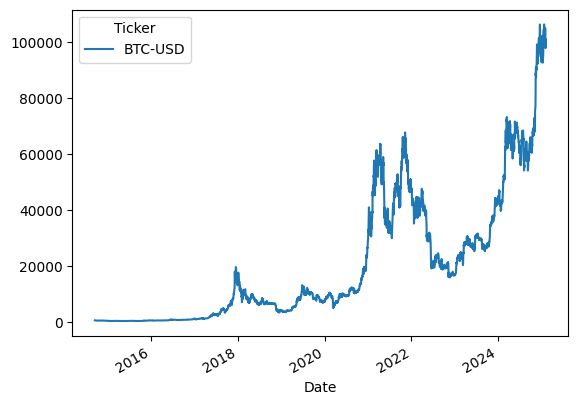

In [2]:
import yfinance as yf
data = yf.download(
		tickers=['BTC-USD'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="max",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1d")
# Plot the close prices
data.Close.plot()
index = data.index.get_level_values(0)
print(index.shape)
print(data.shape)
print(data.columns)
print(data.head())
plt.show()

**Dataframe test**

In [3]:
print(data.describe())

Price           Close           High            Low           Open  \
Ticker        BTC-USD        BTC-USD        BTC-USD        BTC-USD   
count     3793.000000    3793.000000    3793.000000    3793.000000   
mean     20306.382842   20736.577877   19809.897921   20282.230287   
std      23296.696559   23772.408497   22751.165437   23267.588122   
min        178.102997     211.731003     171.509995     176.897003   
25%       1265.489990    1275.550049    1239.750000    1254.290039   
50%       9461.058594    9643.216797    9260.694336    9454.266602   
75%      32127.267578   33292.453125   30681.496094   32129.408203   
max     106146.265625  109114.882812  105291.734375  106147.296875   

Price         Volume  
Ticker       BTC-USD  
count   3.793000e+03  
mean    1.890254e+10  
std     2.066492e+10  
min     5.914570e+06  
25%     4.773380e+08  
50%     1.483742e+10  
75%     3.006664e+10  
max     3.509679e+11  


**Data Collection**

In [12]:
import yfinance as yf

# Define ticker symbols and their corresponding file names
crypto_assets = {
    "BTC-USD": ["btc_long.csv", "btc_med.csv", "btc_short.csv"],
    "WBTC-USD": ["wbtc_long.csv", "wbtc_med.csv", "wbtc_short.csv"],
    "ETH-USD": ["eth_long.csv", "eth_med.csv", "eth_short.csv"],
    "STETH-USD": ["steth_long.csv", "steth_med.csv", "steth_short.csv"],
    "MPRO31258-USD": ["maxpro_long.csv", "maxpro_med.csv", "maxpro_short.csv"],
}

# Define periods and intervals
periods_intervals = [
    ("max", "1d"),  # Long-term daily data
    ("2y", "1h"),   # Medium-term hourly data
    ("1mo", "2m"),  # Short-term 2-minute interval data
]

# Download, save, and check for missing data
for ticker, file_names in crypto_assets.items():
    for (period, interval), file_name in zip(periods_intervals, file_names):
        print(f"📥 Downloading {ticker} data for period: {period}, interval: {interval}...")
        data = yf.download(ticker, period=period, interval=interval)

        if data.empty:
            print(f"⚠️ No data found for {ticker} ({period}, {interval}).")
        else:
            data.to_csv(file_name)
            print(f"✅ {ticker} data saved as '{file_name}'.")

📥 Downloading BTC-USD data for period: max, interval: 1d...


[*********************100%***********************]  1 of 1 completed


✅ BTC-USD data saved as 'btc_long.csv'.
📥 Downloading BTC-USD data for period: 2y, interval: 1h...


[*********************100%***********************]  1 of 1 completed


✅ BTC-USD data saved as 'btc_med.csv'.
📥 Downloading BTC-USD data for period: 1mo, interval: 2m...


[*********************100%***********************]  1 of 1 completed


✅ BTC-USD data saved as 'btc_short.csv'.
📥 Downloading WBTC-USD data for period: max, interval: 1d...


[*********************100%***********************]  1 of 1 completed


✅ WBTC-USD data saved as 'wbtc_long.csv'.
📥 Downloading WBTC-USD data for period: 2y, interval: 1h...


[*********************100%***********************]  1 of 1 completed


✅ WBTC-USD data saved as 'wbtc_med.csv'.
📥 Downloading WBTC-USD data for period: 1mo, interval: 2m...


[*********************100%***********************]  1 of 1 completed


✅ WBTC-USD data saved as 'wbtc_short.csv'.
📥 Downloading ETH-USD data for period: max, interval: 1d...


[*********************100%***********************]  1 of 1 completed


✅ ETH-USD data saved as 'eth_long.csv'.
📥 Downloading ETH-USD data for period: 2y, interval: 1h...


[*********************100%***********************]  1 of 1 completed


✅ ETH-USD data saved as 'eth_med.csv'.
📥 Downloading ETH-USD data for period: 1mo, interval: 2m...


[*********************100%***********************]  1 of 1 completed


✅ ETH-USD data saved as 'eth_short.csv'.
📥 Downloading STETH-USD data for period: max, interval: 1d...


[*********************100%***********************]  1 of 1 completed


✅ STETH-USD data saved as 'steth_long.csv'.
📥 Downloading STETH-USD data for period: 2y, interval: 1h...


[*********************100%***********************]  1 of 1 completed


✅ STETH-USD data saved as 'steth_med.csv'.
📥 Downloading STETH-USD data for period: 1mo, interval: 2m...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

✅ STETH-USD data saved as 'steth_short.csv'.
📥 Downloading MPRO31258-USD data for period: max, interval: 1d...
✅ MPRO31258-USD data saved as 'maxpro_long.csv'.
📥 Downloading MPRO31258-USD data for period: 2y, interval: 1h...



[*********************100%***********************]  1 of 1 completed


✅ MPRO31258-USD data saved as 'maxpro_med.csv'.
📥 Downloading MPRO31258-USD data for period: 1mo, interval: 2m...


[*********************100%***********************]  1 of 1 completed

✅ MPRO31258-USD data saved as 'maxpro_short.csv'.


Downloading and saving the files to upload on github

In [13]:
from google.colab import files

# List of saved CSV files
csv_files = ["btc_long.csv", "btc_med.csv", "btc_short.csv",
             "wbtc_long.csv", "wbtc_med.csv", "wbtc_short.csv",
             "eth_long.csv", "eth_med.csv", "eth_short.csv",
             "steth_long.csv", "steth_med.csv", "steth_short.csv",
             "maxpro_long.csv", "maxpro_med.csv", "maxpro_short.csv"]

# Download each file
for file in csv_files:
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import pandas as pd

# Define GitHub raw URLs for the cryptocurrency datasets
base_url = "https://raw.githubusercontent.com/selam-max/BT/main/"

cryptos = ["Bitcoin", "WBTC", "ETH", "STETH", "MPRO"]
timeframes = ["short", "med", "long"]

# Build URLs for each cryptocurrency and timeframe
urls = {
    coin: {
        timeframe: f"{base_url}{coin.lower()}_{timeframe}.csv"
        for timeframe in timeframes
    }
    for coin in cryptos
}

# Load all datasets into a nested dictionary
crypto_data = {}
for coin, time_dict in urls.items():
    crypto_data[coin] = {}
    for timeframe, url in time_dict.items():
        try:
            df = pd.read_csv(url)
            crypto_data[coin][timeframe] = df
            print(f"✅ Loaded {coin} - {timeframe} term data.")
        except Exception as e:
            print(f"❌ Failed to load {coin} - {timeframe} data: {e}")

# Display basic info for each dataset
for coin, time_dict in crypto_data.items():
    print(f"\n📊 {coin} Data Overview:")
    for timeframe, df in time_dict.items():
        print(f"\n🔹 {coin} - {timeframe} term")
        print(df.info())  # Column info
        print(df.head())  # First few rows

❌ Failed to load Bitcoin - short data: HTTP Error 404: Not Found
❌ Failed to load Bitcoin - med data: HTTP Error 404: Not Found
❌ Failed to load Bitcoin - long data: HTTP Error 404: Not Found
✅ Loaded WBTC - short term data.
✅ Loaded WBTC - med term data.
✅ Loaded WBTC - long term data.
✅ Loaded ETH - short term data.
✅ Loaded ETH - med term data.
✅ Loaded ETH - long term data.
✅ Loaded STETH - short term data.
✅ Loaded STETH - med term data.
✅ Loaded STETH - long term data.
❌ Failed to load MPRO - short data: HTTP Error 404: Not Found
❌ Failed to load MPRO - med data: HTTP Error 404: Not Found
❌ Failed to load MPRO - long data: HTTP Error 404: Not Found

📊 Bitcoin Data Overview:

📊 WBTC Data Overview:

🔹 WBTC - short term
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8901 entries, 0 to 8900
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   8901 non-null   object
 1   Close   8900 non-null   object
 2   High    8900

**Preprocessing of the fetched data**

In [22]:
# Function to clean and preprocess data
def clean_crypto_data(df, coin_name, timeframe):
    print(f"\n🔹 Cleaning {coin_name} - {timeframe} term data...")

    # Print columns to debug
    print("Columns in dataset:", df.columns)

    # 1. Check if there's any column to use as a datetime (if 'Date' is missing)
    if 'Price' in df.columns:
        print("Warning: 'Price' is being used as the date column, which seems incorrect.")
        print("Please manually verify the dataset for correct date column.")
        # If 'Price' should be a numerical column, ignore it as a date and proceed with other assumptions.
        # Assuming the 'Date' or other proper datetime is missing, set the index as a fallback.
        df['Date'] = pd.to_datetime(df.index, errors='coerce')  # Use the index as date if applicable
    else:
        # Otherwise, use the existing 'Date' or fallback to the first column
        date_column = 'Date' if 'Date' in df.columns else df.columns[0]
        df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

    # 2. Drop rows with invalid dates (null after coercion)
    df = df.dropna(subset=['Date'])

    # 3. Remove duplicates
    df = df.drop_duplicates()

    # 4. Handle missing values (forward fill)
    df = df.ffill()  # Using the recommended .ffill() method

    # 5. Sort by Date (ensure chronological order)
    df = df.sort_values(by='Date')

    # 6. Normalize column names
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # 7. Ensure all relevant columns are numeric (for calculations)
    numeric_cols = ['price', 'close', 'high', 'low', 'open', 'volume']  # Assuming these are relevant columns
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # 8. Handle outliers in the 'close' price
    if 'close' in df.columns:
        q1 = df['close'].quantile(0.25)
        q3 = df['close'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df['close'] >= lower_bound) & (df['close'] <= upper_bound)]

    print(f"✅ Cleaned {coin_name} - {timeframe} term data. Final shape: {df.shape}")
    return df

# Apply cleaning and feature engineering
cleaned_crypto_data = {
    coin: {
        timeframe: add_features(clean_crypto_data(df, coin, timeframe))
        for timeframe, df in time_dict.items()
    }
    for coin, time_dict in crypto_data.items()
}

# Check final data shapes
for coin, time_dict in cleaned_crypto_data.items():
    print(f"\n📊 {coin} Data Overview:")
    for timeframe, df in time_dict.items():
        print(f"{coin} - {timeframe} term: {df.shape}")


🔹 Cleaning WBTC - short term data...
Columns in dataset: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Please manually verify the dataset for correct date column.
✅ Cleaned WBTC - short term data. Final shape: (8899, 7)
✅ Added features: returns, MA, volatility, RSI, Bollinger Bands. Final shape: (8899, 15)

🔹 Cleaning WBTC - med term data...
Columns in dataset: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Please manually verify the dataset for correct date column.
✅ Cleaned WBTC - med term data. Final shape: (17460, 7)
✅ Added features: returns, MA, volatility, RSI, Bollinger Bands. Final shape: (17460, 15)

🔹 Cleaning WBTC - long term data...
Columns in dataset: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Please manually verify the dataset for correct date column.
✅ Cleaned WBTC - long term data. Final shape: (2184, 7)
✅ Added features: returns, MA, volatility, RSI, Bollinger Bands. Final shape

Exploratory Data Analysis

Further cleaning and Visualizations

In [29]:
import matplotlib.pyplot as plt

# Function to clean and convert Date column
def clean_and_convert_date(df):
    # Ensure 'Date' column is in datetime format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df = df.dropna(subset=['Date'])  # Drop rows where date conversion failed
    return df

# Function to plot price trends for each cryptocurrency
def plot_price_trends(crypto_data, coin, timeframe):
    coin = str(coin)  # Ensure coin is treated as a string
    timeframe = str(timeframe)  # Ensure timeframe is treated as a string

    # Debugging: Check types of coin and timeframe
    print(f"Debug: coin={coin}, type={type(coin)} | timeframe={timeframe}, type={type(timeframe)}")

    df = clean_and_convert_date(crypto_data[coin][timeframe])  # Clean and ensure proper date format

    # Check for empty dataframe
    if df.empty:
        print(f"Skipping {coin} {timeframe} - No valid data.")
        return

    # Check for non-numeric values in the 'Close' column
    if not pd.api.types.is_numeric_dtype(df['Close']):
        print(f"Skipping {coin} {timeframe} - 'Close' column contains non-numeric values.")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label=f'{coin} {timeframe} - Close Price')
    plt.title(f'{coin} {timeframe} Term - Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Function to plot volume trends for each cryptocurrency
def plot_volume_trends(crypto_data, coin, timeframe):
    coin = str(coin)  # Ensure coin is treated as a string
    timeframe = str(timeframe)  # Ensure timeframe is treated as a string

    # Debugging: Check types of coin and timeframe
    print(f"Debug: coin={coin}, type={type(coin)} | timeframe={timeframe}, type={type(timeframe)}")

    df = clean_and_convert_date(crypto_data[coin][timeframe])  # Clean and ensure proper date format

    # Check for empty dataframe
    if df.empty:
        print(f"Skipping {coin} {timeframe} - No valid data.")
        return

    # Check for non-numeric values in the 'Volume' column
    if not pd.api.types.is_numeric_dtype(df['Volume']):
        print(f"Skipping {coin} {timeframe} - 'Volume' column contains non-numeric values.")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Volume'], label=f'{coin} {timeframe} - Volume', color='orange')
    plt.title(f'{coin} {timeframe} Term - Volume Trend')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Function to plot price distribution for each cryptocurrency
def plot_price_distribution(crypto_data, coin, timeframe):
    coin = str(coin)  # Ensure coin is treated as a string
    timeframe = str(timeframe)  # Ensure timeframe is treated as a string

    # Debugging: Check types of coin and timeframe
    print(f"Debug: coin={coin}, type={type(coin)} | timeframe={timeframe}, type={type(timeframe)}")

    df = clean_and_convert_date(crypto_data[coin][timeframe])  # Clean and ensure proper date format

    # Check for empty dataframe
    if df.empty:
        print(f"Skipping {coin} {timeframe} - No valid data.")
        return

    # Check for non-numeric values in the 'Close' column
    if not pd.api.types.is_numeric_dtype(df['Close']):
        print(f"Skipping {coin} {timeframe} - 'Close' column contains non-numeric values.")
        return

    plt.figure(figsize=(12, 6))
    plt.hist(df['Close'], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{coin} {timeframe} Term - Price Distribution')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.show()

# Loop through all cryptos and timeframes to generate plots
for coin, time_dict in crypto_data.items():
    for timeframe, df in time_dict.items():
        plot_price_trends(crypto_data, coin, timeframe)
        plot_volume_trends(crypto_data, coin, timeframe)
        plot_price_distribution(crypto_data, coin, timeframe)


Debug: coin=WBTC, type=<class 'str'> | timeframe=short, type=<class 'str'>
Skipping WBTC short - 'Close' column contains non-numeric values.
Debug: coin=WBTC, type=<class 'str'> | timeframe=short, type=<class 'str'>
Skipping WBTC short - 'Volume' column contains non-numeric values.
Debug: coin=WBTC, type=<class 'str'> | timeframe=short, type=<class 'str'>
Skipping WBTC short - 'Close' column contains non-numeric values.
Debug: coin=WBTC, type=<class 'str'> | timeframe=med, type=<class 'str'>
Skipping WBTC med - 'Close' column contains non-numeric values.
Debug: coin=WBTC, type=<class 'str'> | timeframe=med, type=<class 'str'>
Skipping WBTC med - 'Volume' column contains non-numeric values.
Debug: coin=WBTC, type=<class 'str'> | timeframe=med, type=<class 'str'>
Skipping WBTC med - 'Close' column contains non-numeric values.
Debug: coin=WBTC, type=<class 'str'> | timeframe=long, type=<class 'str'>
Skipping WBTC long - 'Close' column contains non-numeric values.
Debug: coin=WBTC, type=<c

Debug: coin=WBTC, type=<class 'str'> | timeframe=short, type=<class 'str'>


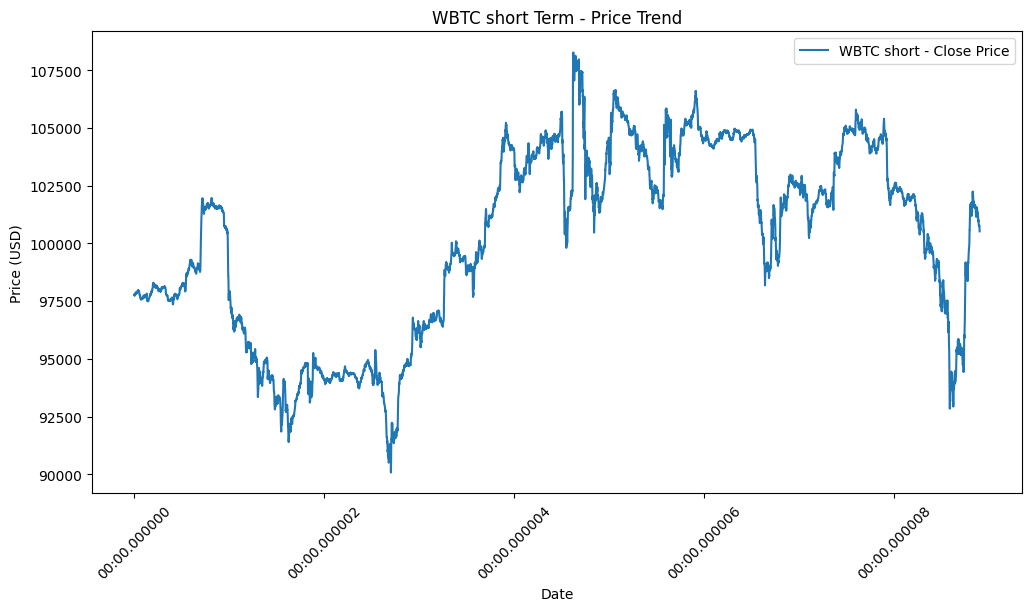

Debug: coin=WBTC, type=<class 'str'> | timeframe=short, type=<class 'str'>


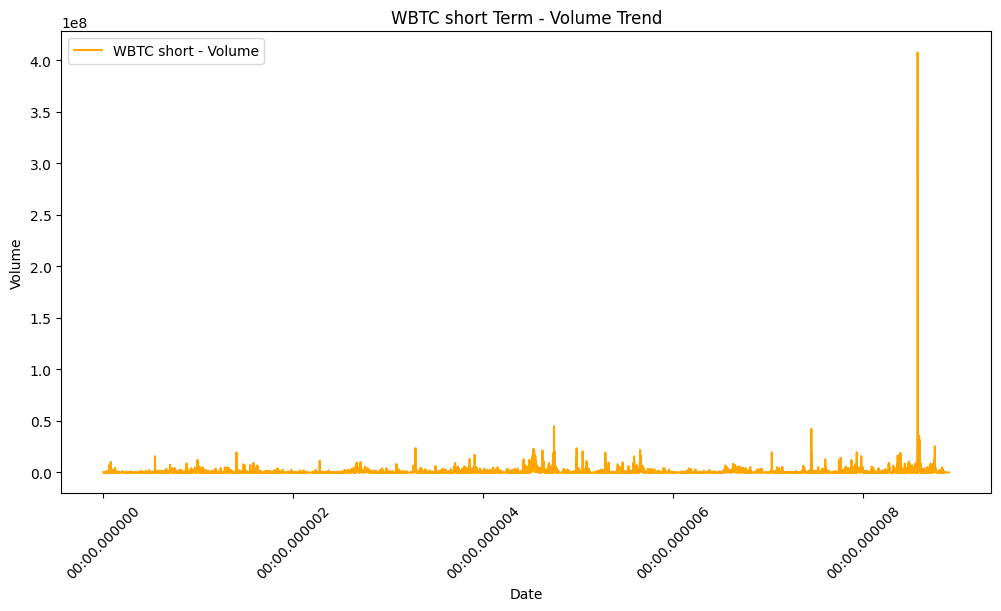

Debug: coin=WBTC, type=<class 'str'> | timeframe=short, type=<class 'str'>


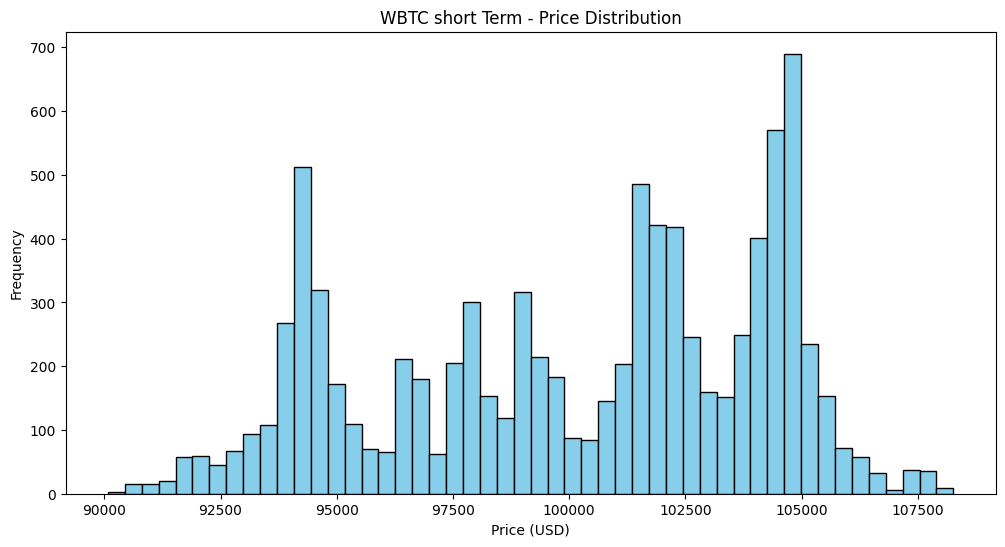

Debug: coin=WBTC, type=<class 'str'> | timeframe=med, type=<class 'str'>


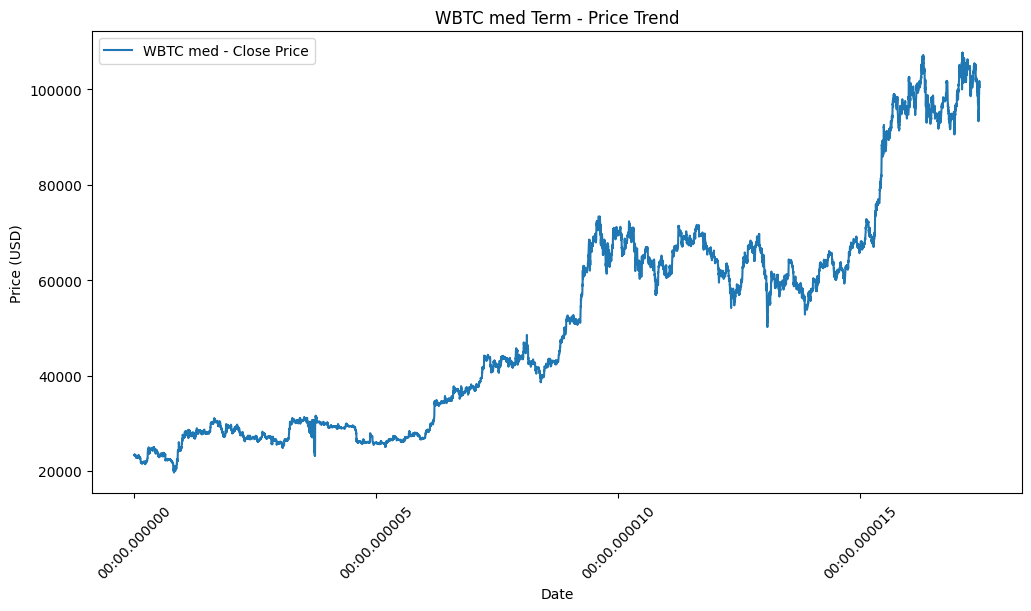

Debug: coin=WBTC, type=<class 'str'> | timeframe=med, type=<class 'str'>


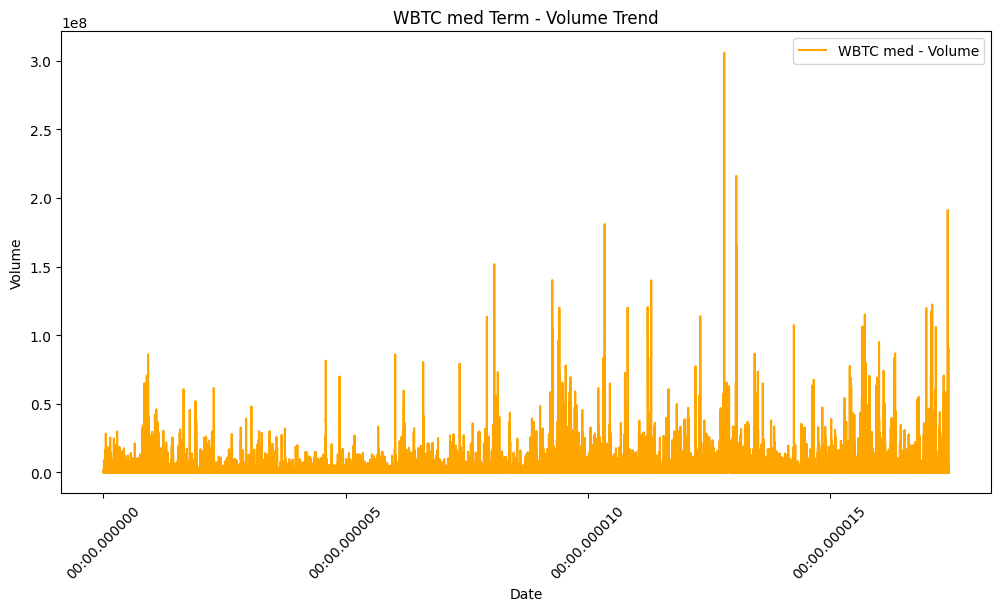

Debug: coin=WBTC, type=<class 'str'> | timeframe=med, type=<class 'str'>


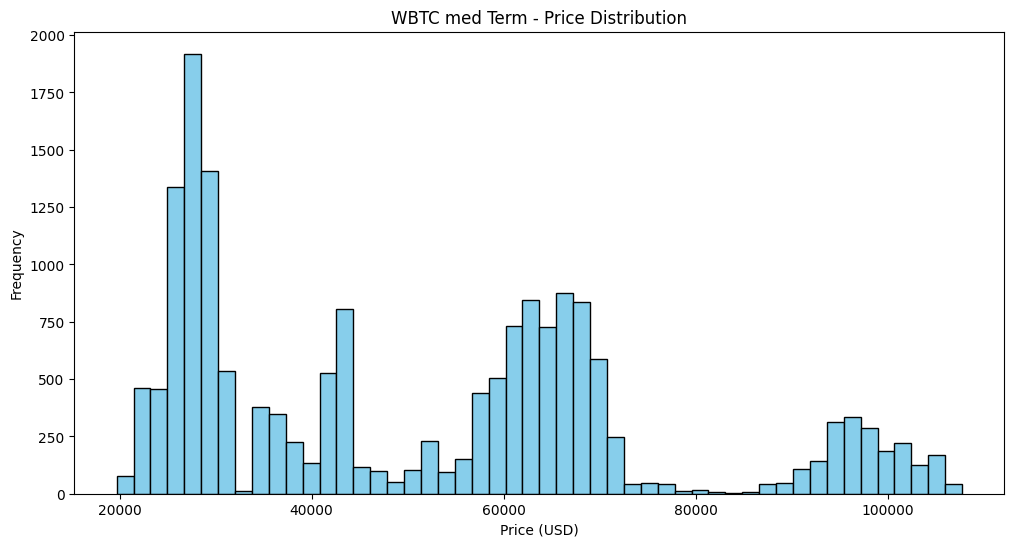

Debug: coin=WBTC, type=<class 'str'> | timeframe=long, type=<class 'str'>


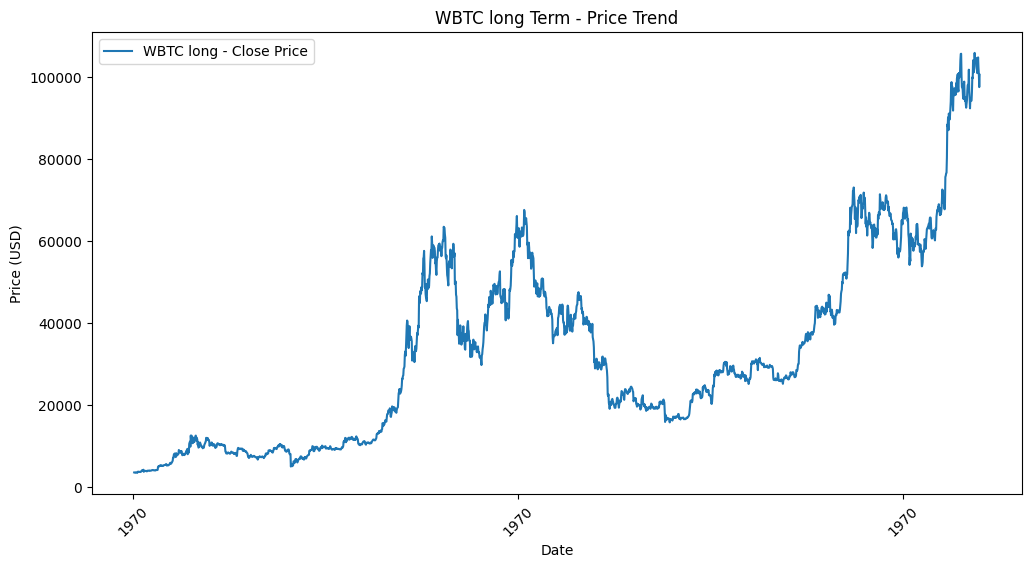

Debug: coin=WBTC, type=<class 'str'> | timeframe=long, type=<class 'str'>


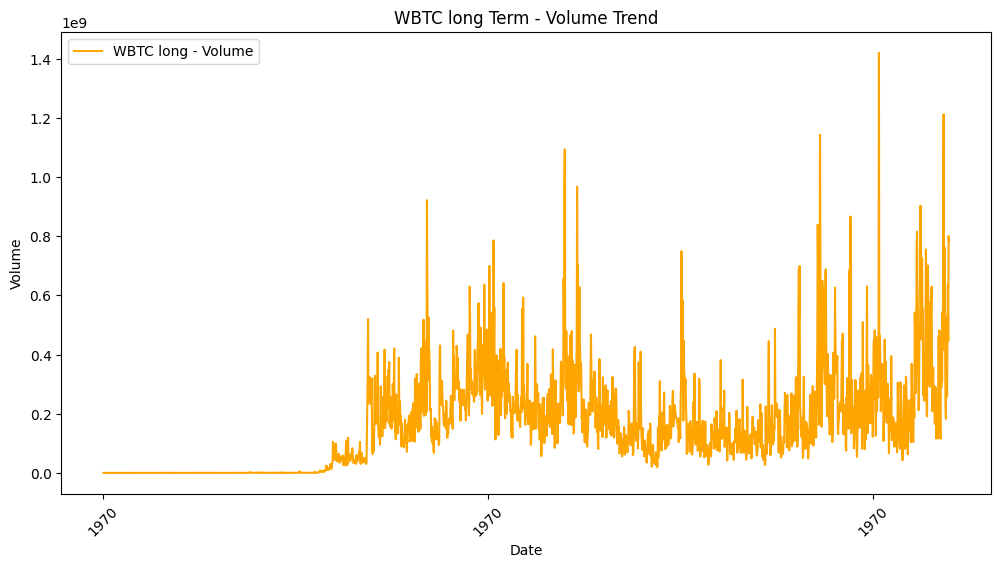

Debug: coin=WBTC, type=<class 'str'> | timeframe=long, type=<class 'str'>


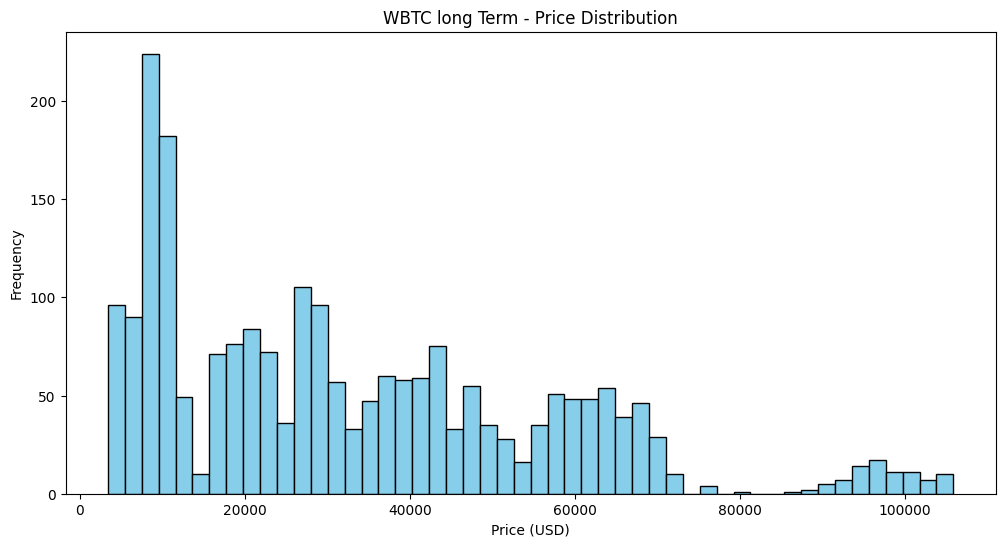

Debug: coin=ETH, type=<class 'str'> | timeframe=short, type=<class 'str'>


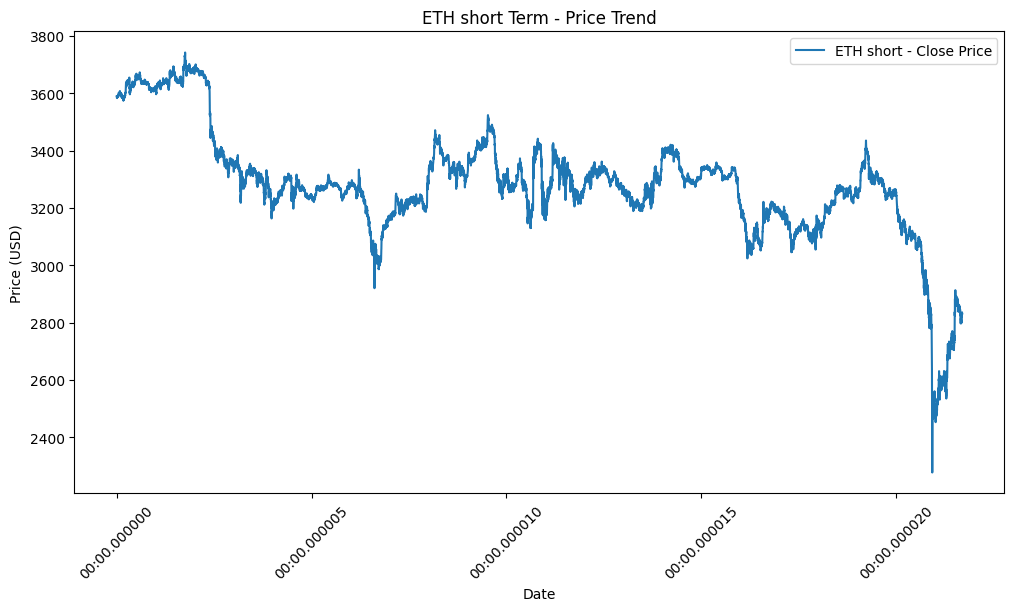

Debug: coin=ETH, type=<class 'str'> | timeframe=short, type=<class 'str'>


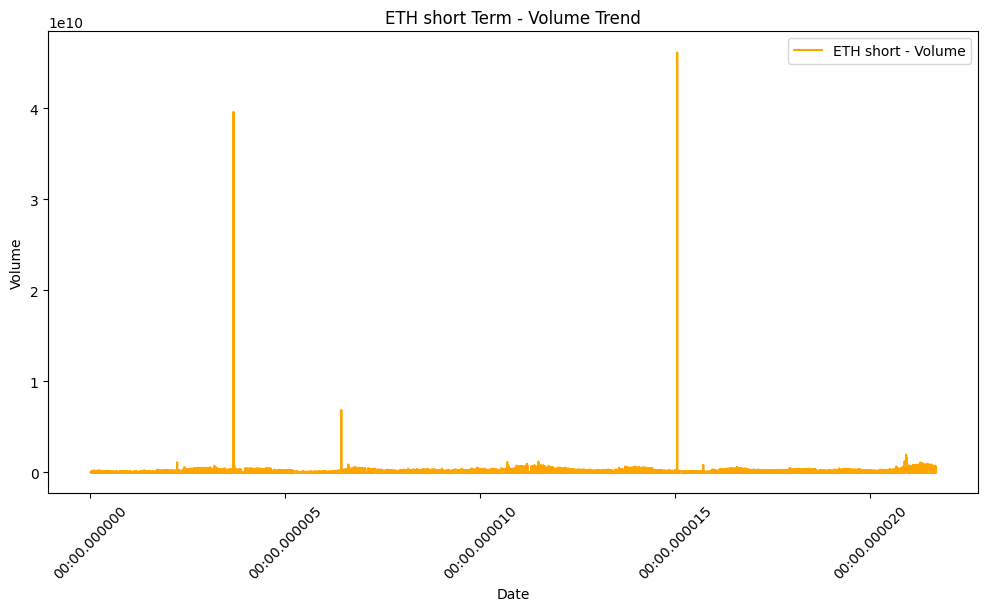

Debug: coin=ETH, type=<class 'str'> | timeframe=short, type=<class 'str'>


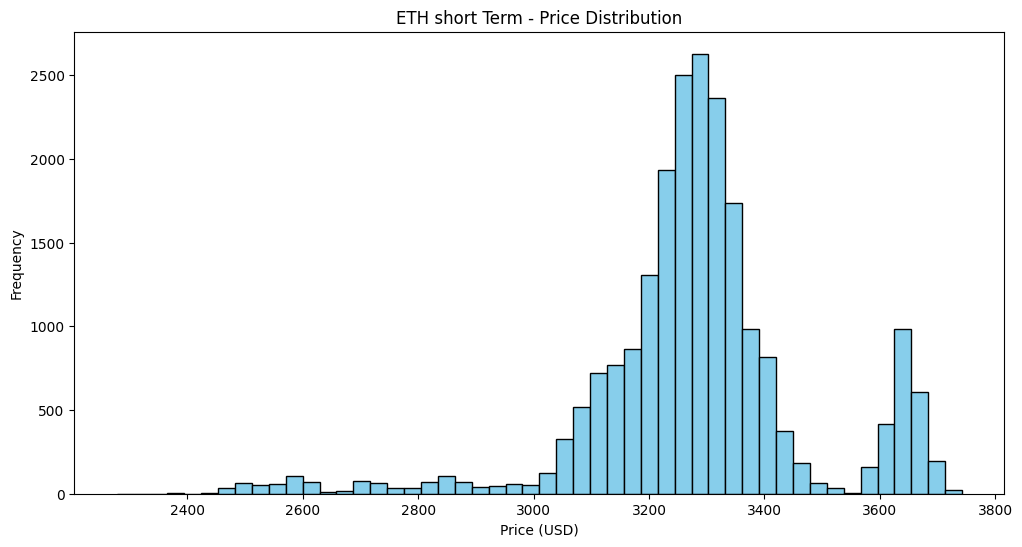

Debug: coin=ETH, type=<class 'str'> | timeframe=med, type=<class 'str'>


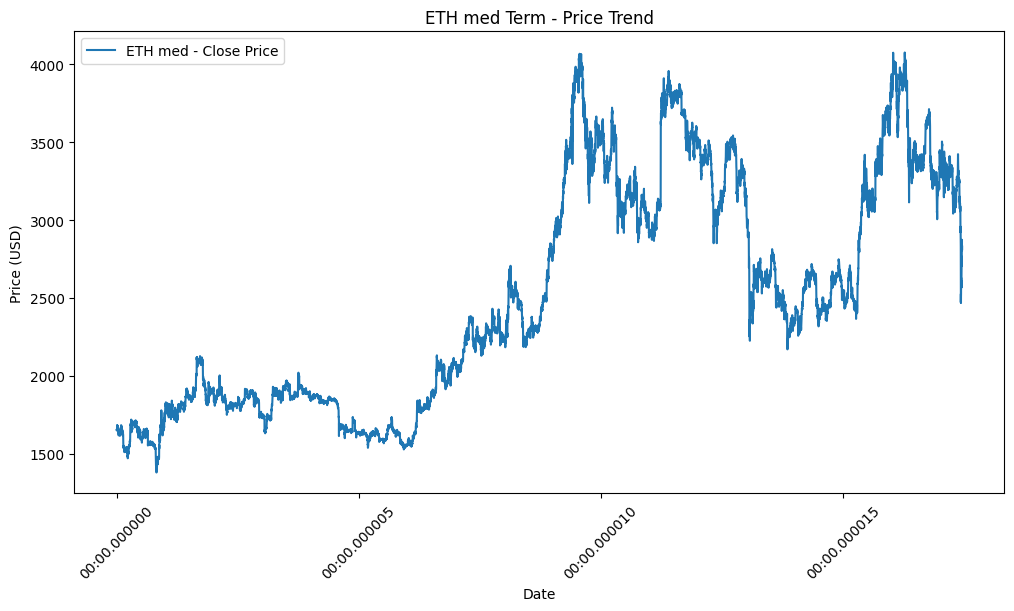

Debug: coin=ETH, type=<class 'str'> | timeframe=med, type=<class 'str'>


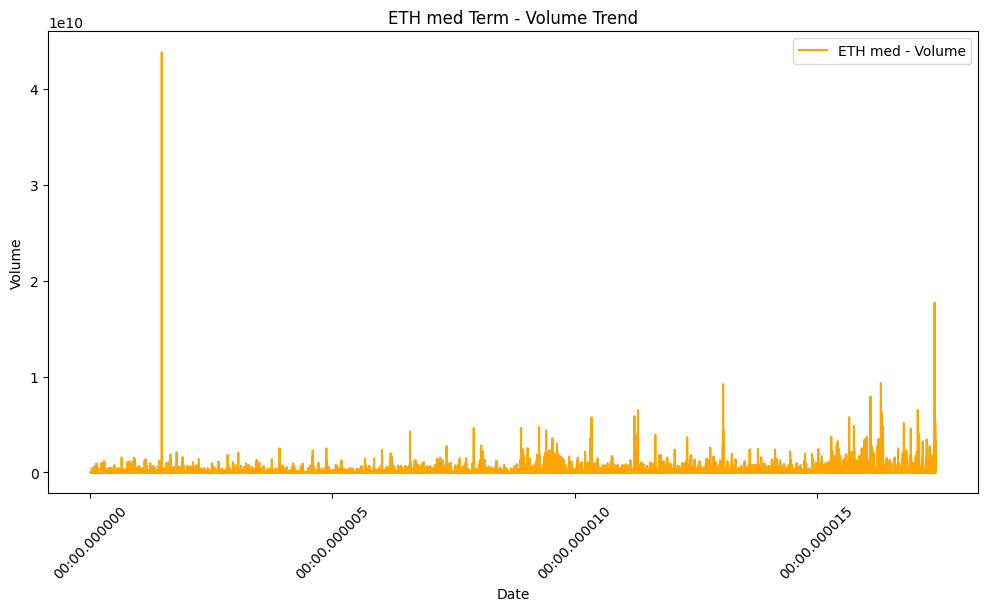

Debug: coin=ETH, type=<class 'str'> | timeframe=med, type=<class 'str'>


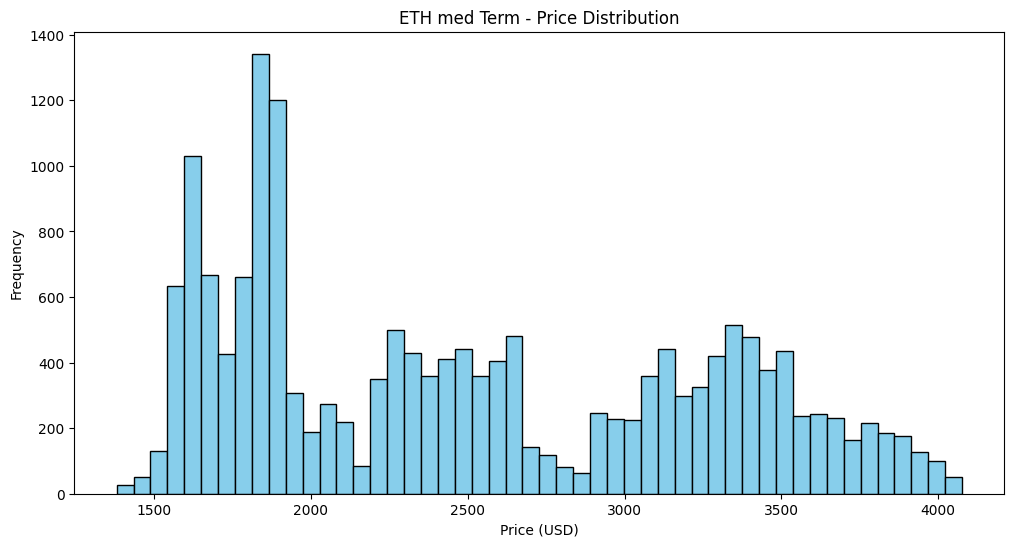

Debug: coin=ETH, type=<class 'str'> | timeframe=long, type=<class 'str'>


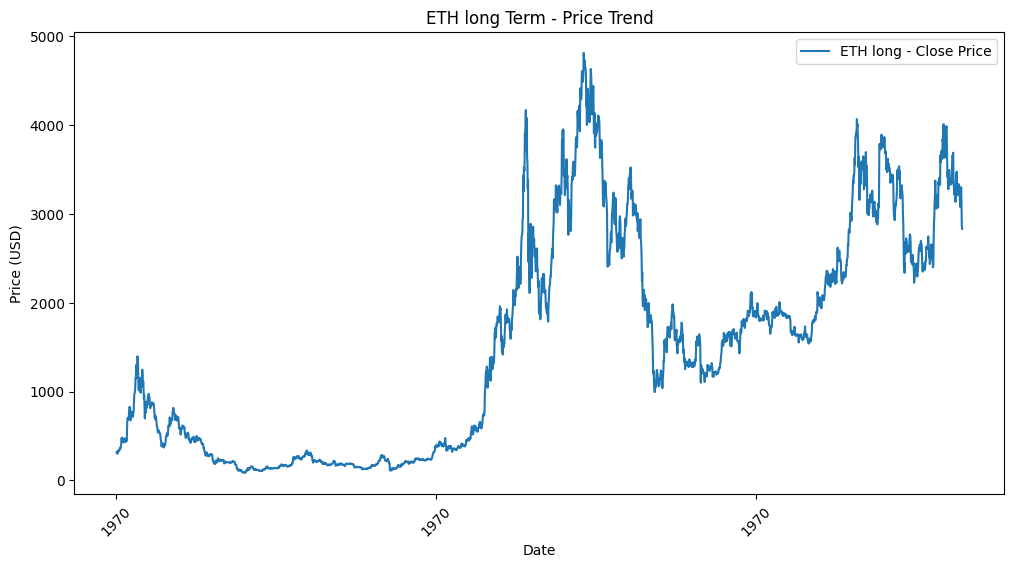

Debug: coin=ETH, type=<class 'str'> | timeframe=long, type=<class 'str'>


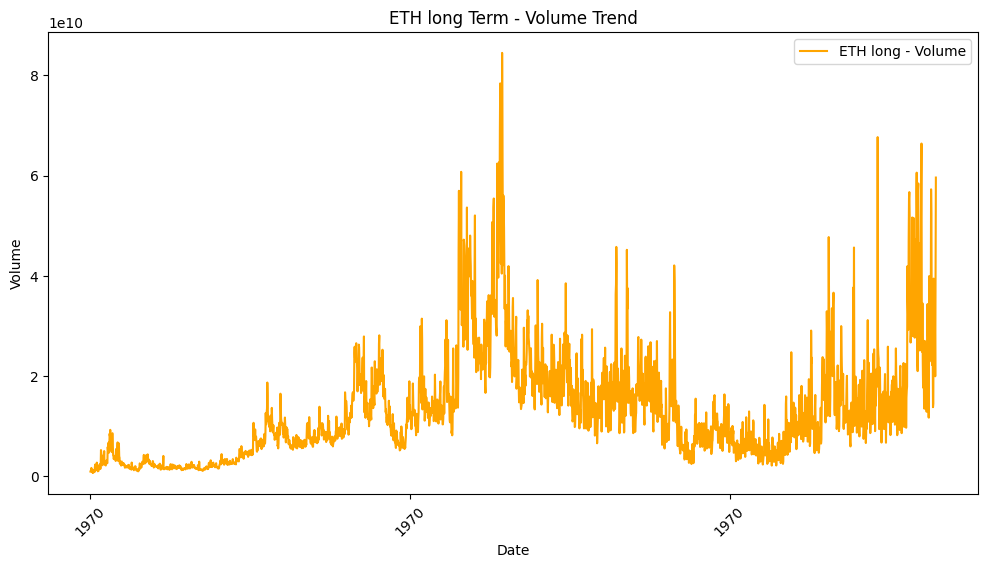

Debug: coin=ETH, type=<class 'str'> | timeframe=long, type=<class 'str'>


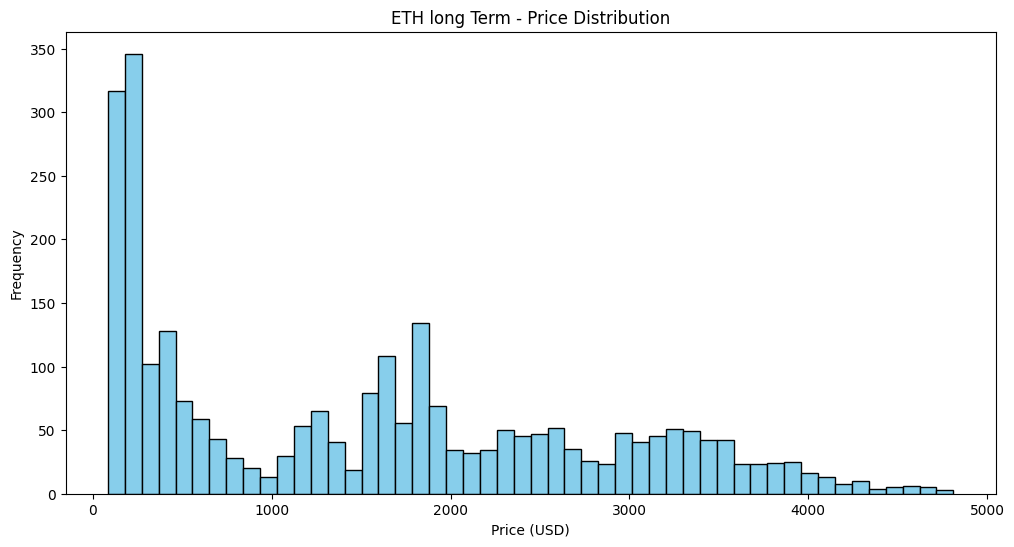

Debug: coin=STETH, type=<class 'str'> | timeframe=short, type=<class 'str'>


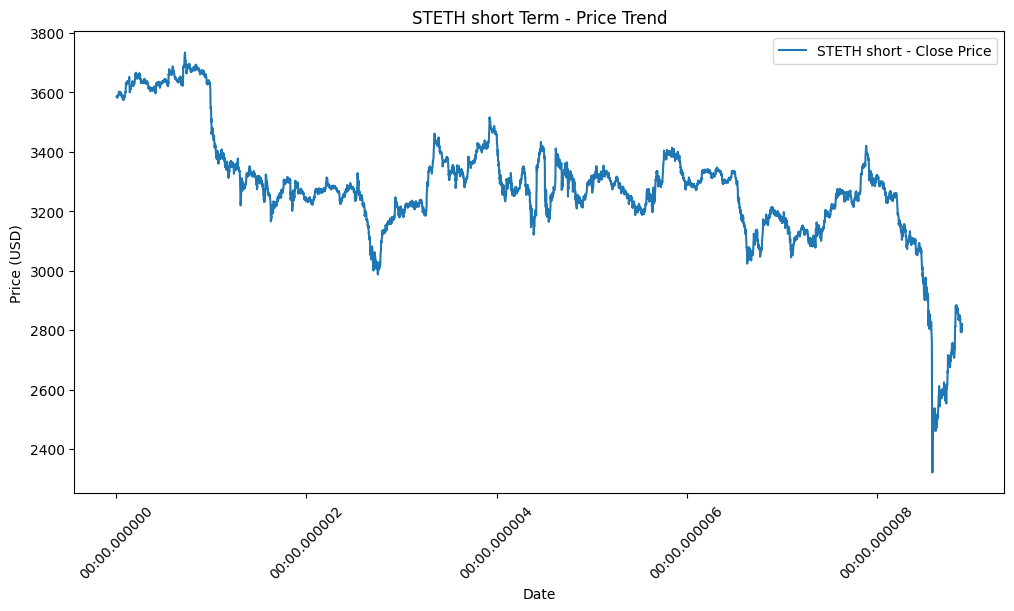

Debug: coin=STETH, type=<class 'str'> | timeframe=short, type=<class 'str'>


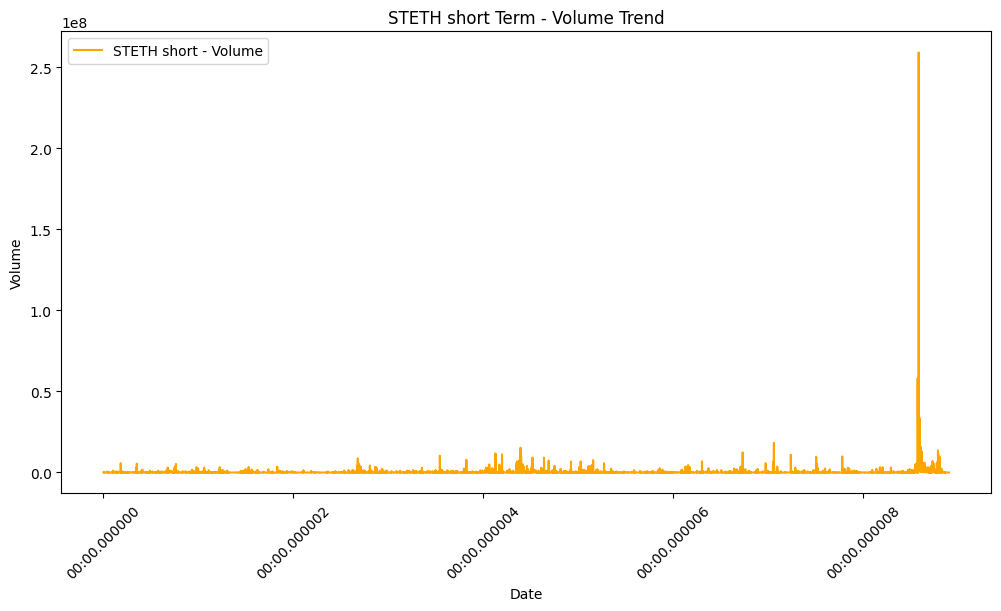

Debug: coin=STETH, type=<class 'str'> | timeframe=short, type=<class 'str'>


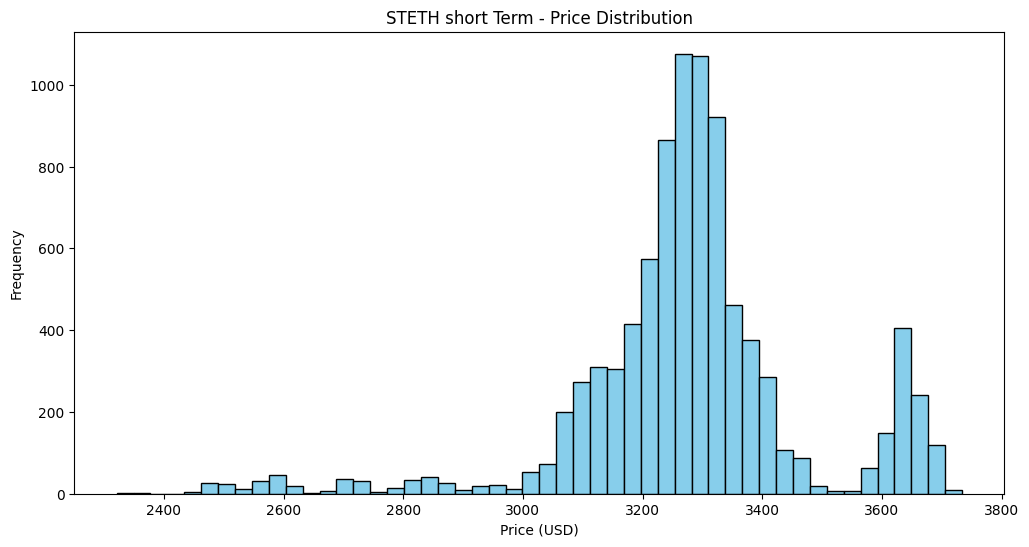

Debug: coin=STETH, type=<class 'str'> | timeframe=med, type=<class 'str'>


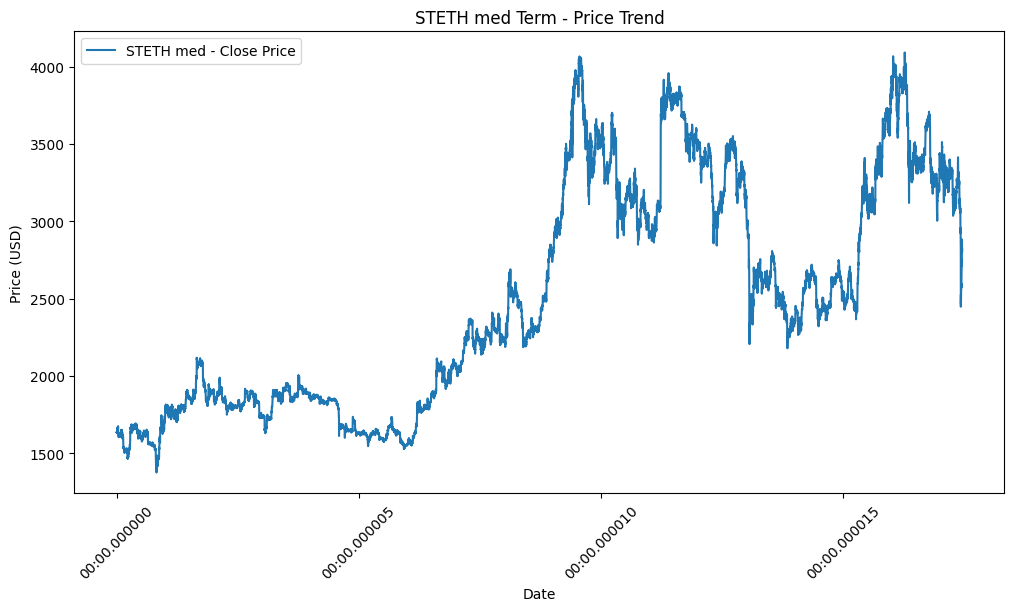

Debug: coin=STETH, type=<class 'str'> | timeframe=med, type=<class 'str'>


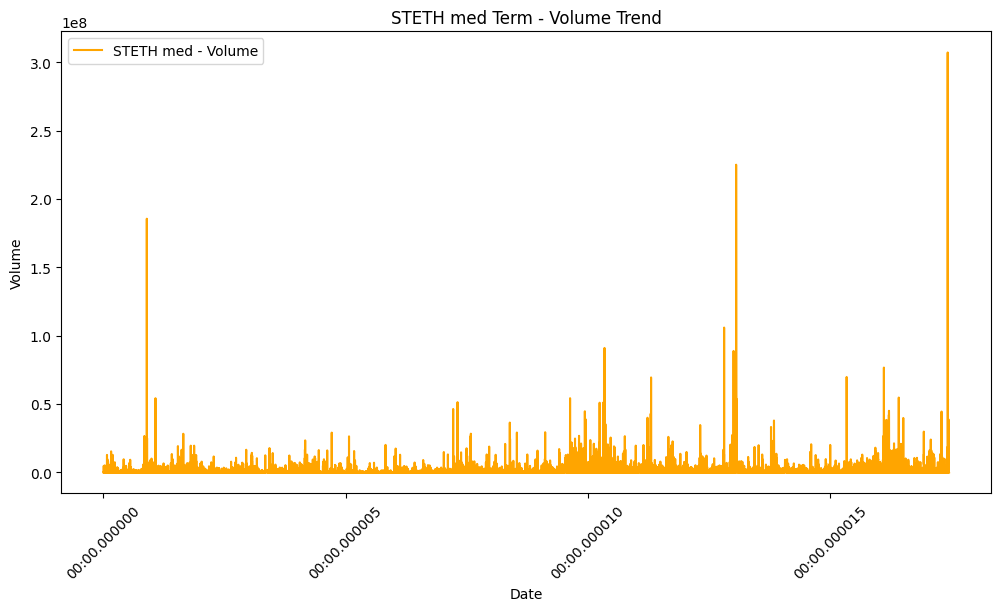

Debug: coin=STETH, type=<class 'str'> | timeframe=med, type=<class 'str'>


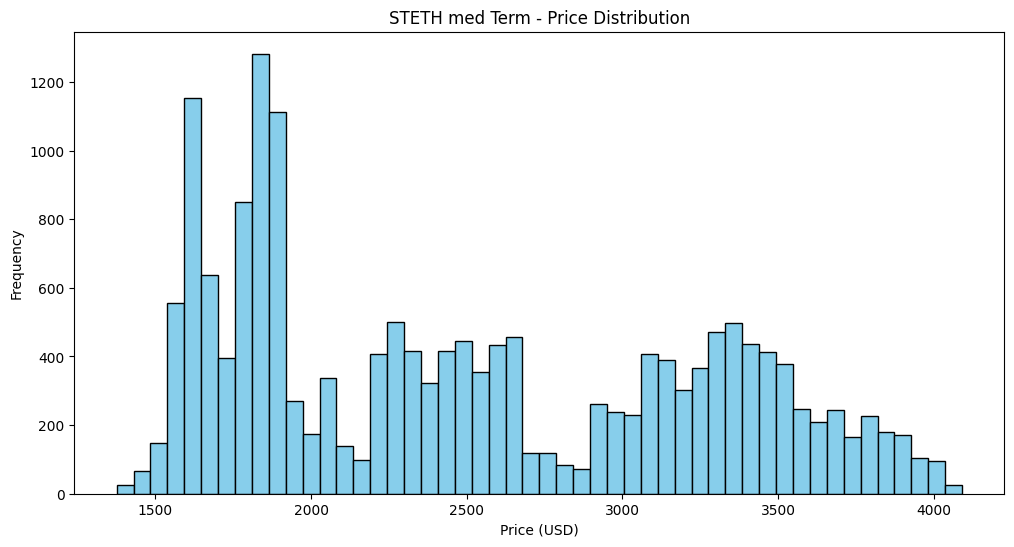

Debug: coin=STETH, type=<class 'str'> | timeframe=long, type=<class 'str'>


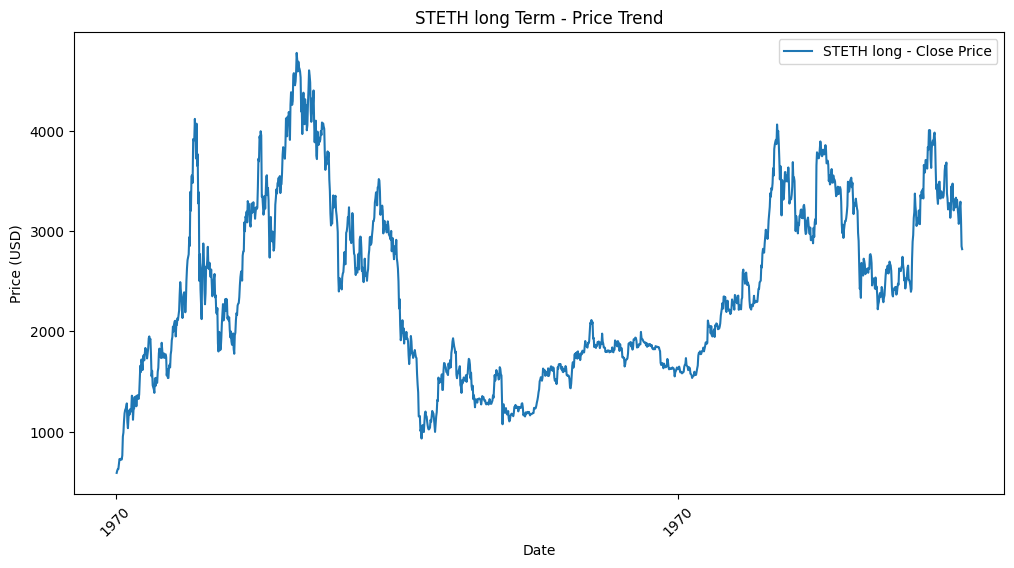

Debug: coin=STETH, type=<class 'str'> | timeframe=long, type=<class 'str'>


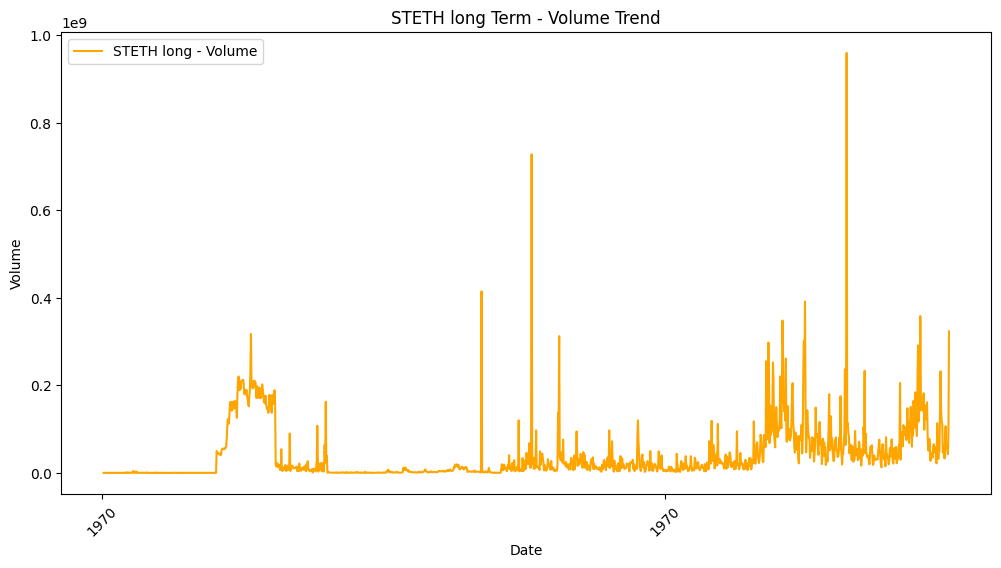

Debug: coin=STETH, type=<class 'str'> | timeframe=long, type=<class 'str'>


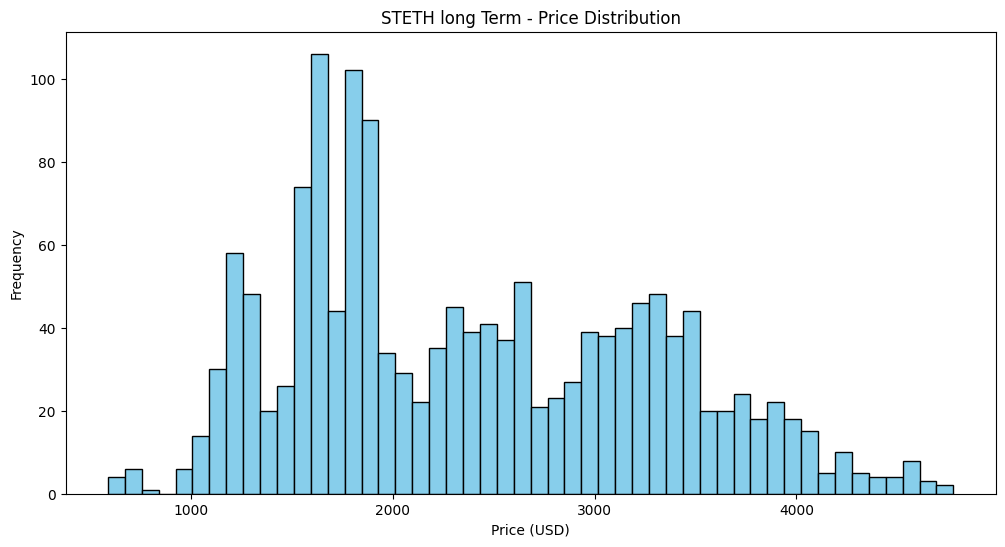

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to clean and convert Date and numeric columns (Close, Volume)
def clean_and_convert_date(df):
    # Ensure 'Date' column is in datetime format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df = df.dropna(subset=['Date'])  # Drop rows where date conversion failed

    # Convert 'Close' and 'Volume' to numeric, coercing errors (non-numeric to NaN)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

    # Drop rows where 'Close' or 'Volume' are NaN
    df = df.dropna(subset=['Close', 'Volume'])

    return df

# Function to plot price trends for each cryptocurrency
def plot_price_trends(crypto_data, coin, timeframe):
    coin = str(coin)  # Ensure coin is treated as a string
    timeframe = str(timeframe)  # Ensure timeframe is treated as a string

    # Debugging: Check types of coin and timeframe
    print(f"Debug: coin={coin}, type={type(coin)} | timeframe={timeframe}, type={type(timeframe)}")

    df = clean_and_convert_date(crypto_data[coin][timeframe])  # Clean and ensure proper date format

    # Check for empty dataframe
    if df.empty:
        print(f"Skipping {coin} {timeframe} - No valid data.")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label=f'{coin} {timeframe} - Close Price')
    plt.title(f'{coin} {timeframe} Term - Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Function to plot volume trends for each cryptocurrency
def plot_volume_trends(crypto_data, coin, timeframe):
    coin = str(coin)  # Ensure coin is treated as a string
    timeframe = str(timeframe)  # Ensure timeframe is treated as a string

    # Debugging: Check types of coin and timeframe
    print(f"Debug: coin={coin}, type={type(coin)} | timeframe={timeframe}, type={type(timeframe)}")

    df = clean_and_convert_date(crypto_data[coin][timeframe])  # Clean and ensure proper date format

    # Check for empty dataframe
    if df.empty:
        print(f"Skipping {coin} {timeframe} - No valid data.")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Volume'], label=f'{coin} {timeframe} - Volume', color='orange')
    plt.title(f'{coin} {timeframe} Term - Volume Trend')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Function to plot price distribution for each cryptocurrency
def plot_price_distribution(crypto_data, coin, timeframe):
    coin = str(coin)  # Ensure coin is treated as a string
    timeframe = str(timeframe)  # Ensure timeframe is treated as a string

    # Debugging: Check types of coin and timeframe
    print(f"Debug: coin={coin}, type={type(coin)} | timeframe={timeframe}, type={type(timeframe)}")

    df = clean_and_convert_date(crypto_data[coin][timeframe])  # Clean and ensure proper date format

    # Check for empty dataframe
    if df.empty:
        print(f"Skipping {coin} {timeframe} - No valid data.")
        return

    plt.figure(figsize=(12, 6))
    plt.hist(df['Close'], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{coin} {timeframe} Term - Price Distribution')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.show()

# Loop through all cryptos and timeframes to generate plots
for coin, time_dict in crypto_data.items():
    for timeframe, df in time_dict.items():
        plot_price_trends(crypto_data, coin, timeframe)
        plot_volume_trends(crypto_data, coin, timeframe)
        plot_price_distribution(crypto_data, coin, timeframe)

Statistics and correlations

Summary Statistics for WBTC short - Close Price:
count      8899.000000
mean     100143.232648
std        4110.691943
min       90077.187500
25%       96638.742188
50%      101328.078125
75%      104003.078125
max      108266.039062
Name: Close, dtype: float64


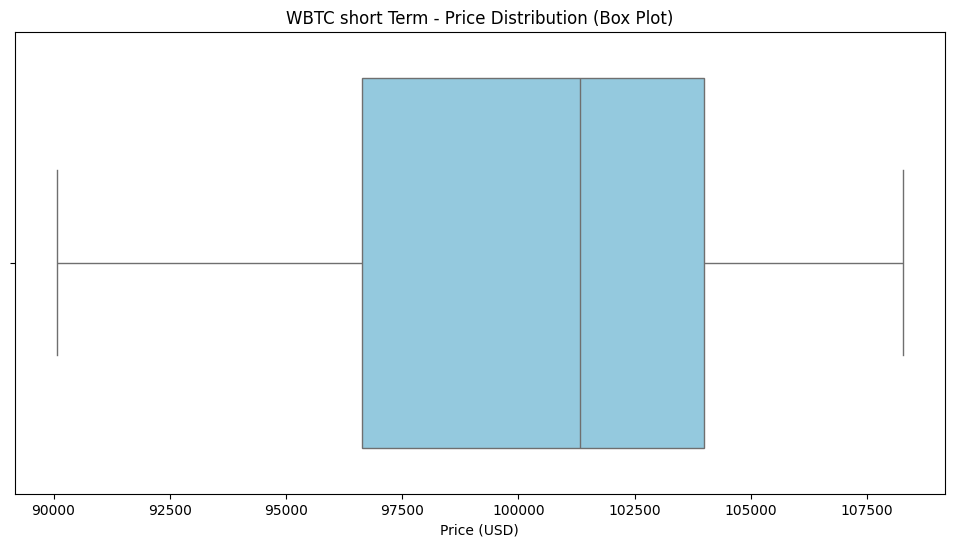

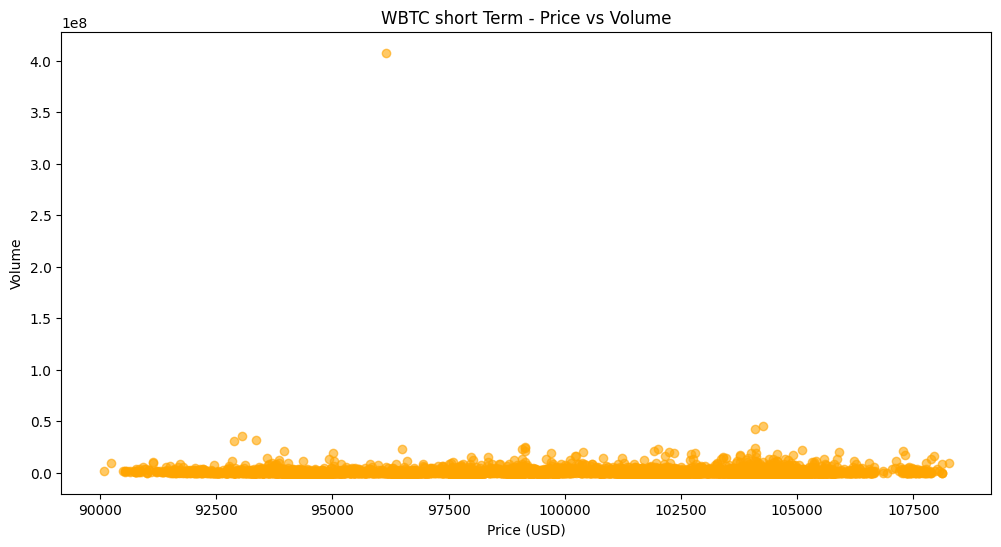

Summary Statistics for WBTC med - Close Price:
count     17460.000000
mean      51151.387755
std       23428.222071
min       19697.607422
25%       28706.604492
50%       46017.060547
75%       66373.388672
max      107756.546875
Name: Close, dtype: float64


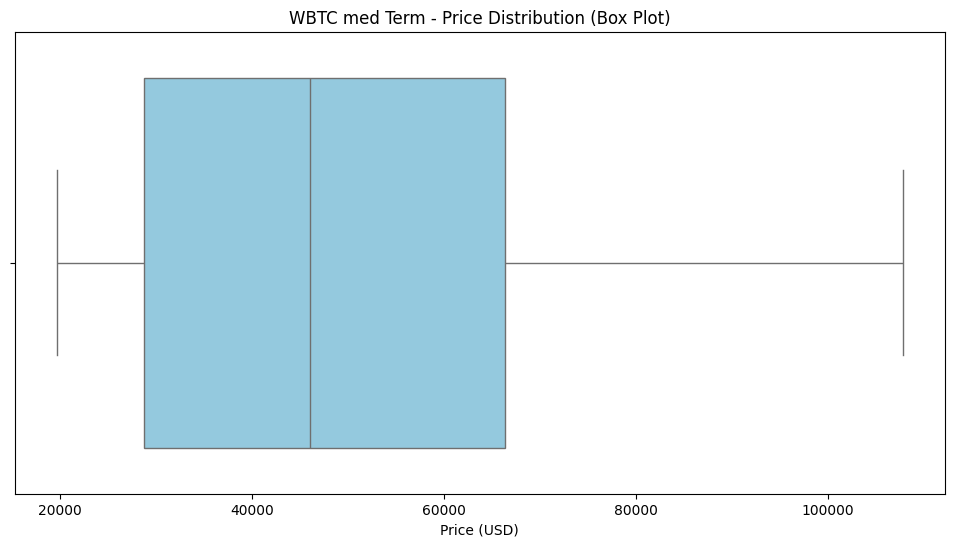

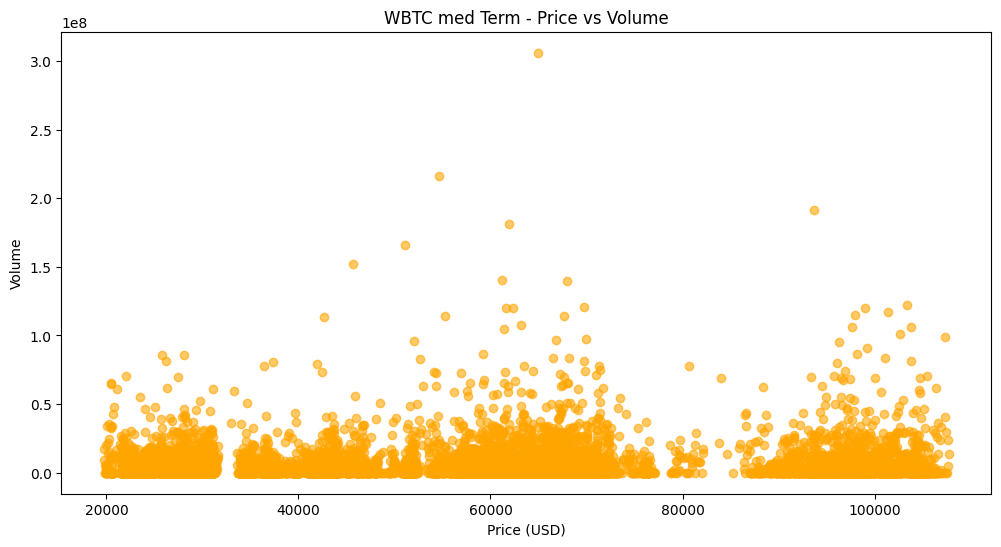

Summary Statistics for WBTC long - Close Price:
count      2197.000000
mean      32904.911248
std       23387.619210
min        3395.978516
25%       10908.859375
50%       28065.191406
75%       47512.507812
max      105859.054688
Name: Close, dtype: float64


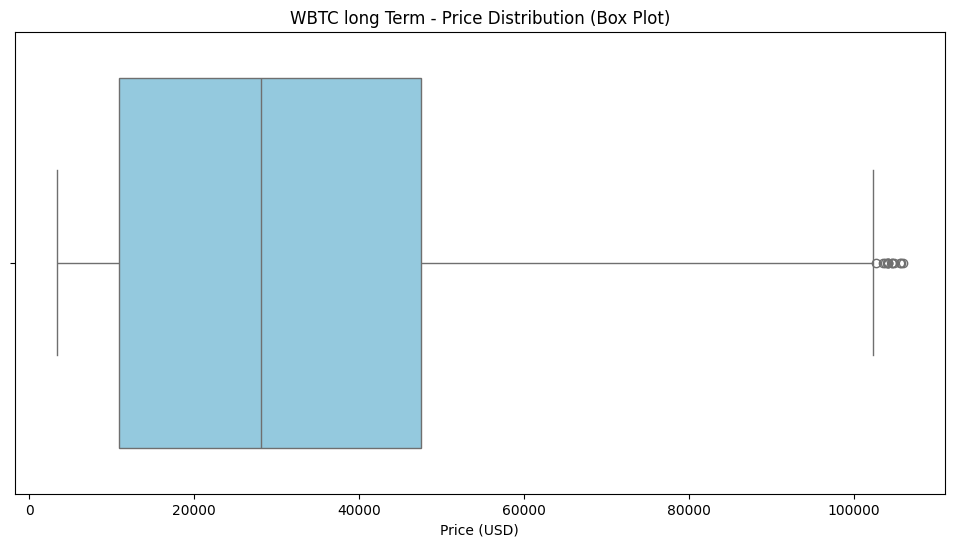

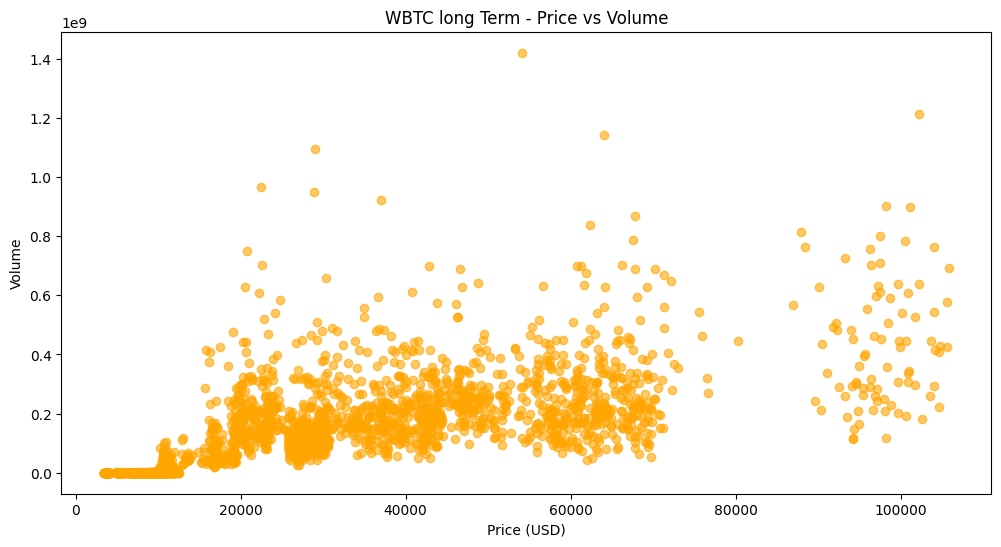

Summary Statistics for ETH short - Close Price:
count    21688.000000
mean      3282.098397
std        194.242749
min       2277.840088
25%       3210.574097
50%       3282.211548
75%       3347.419434
max       3742.588135
Name: Close, dtype: float64


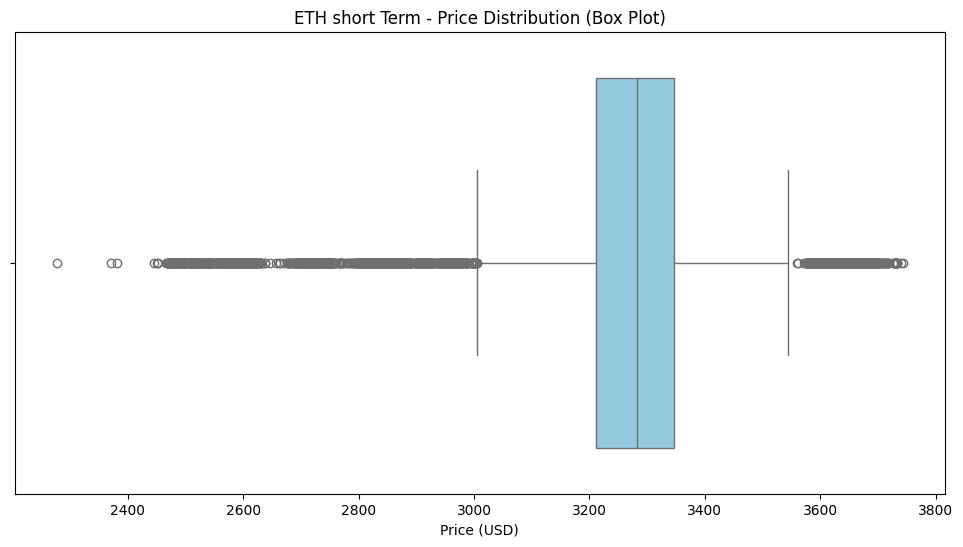

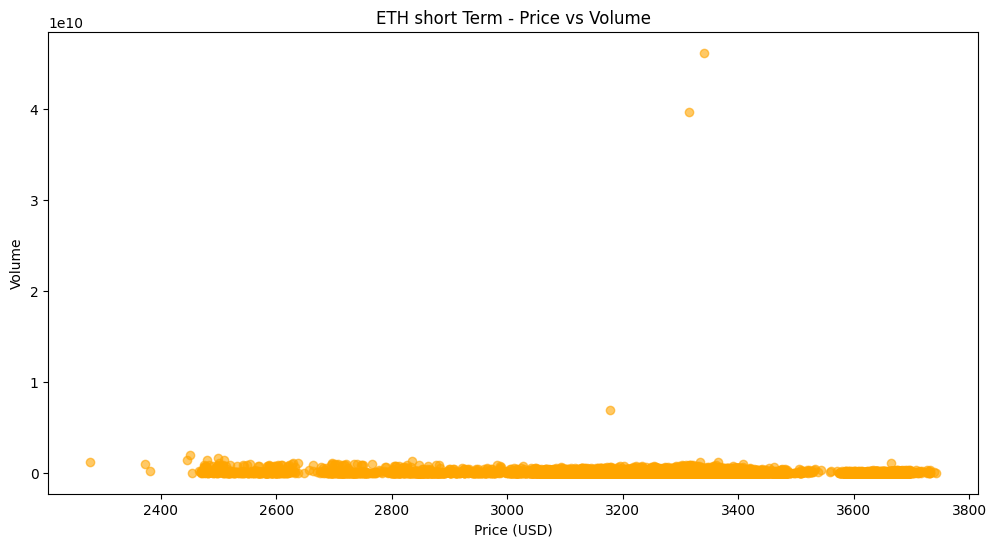

Summary Statistics for ETH med - Close Price:
count    17459.000000
mean      2507.902641
std        730.452694
min       1380.855225
25%       1844.363831
50%       2375.759277
75%       3195.563110
max       4076.342529
Name: Close, dtype: float64


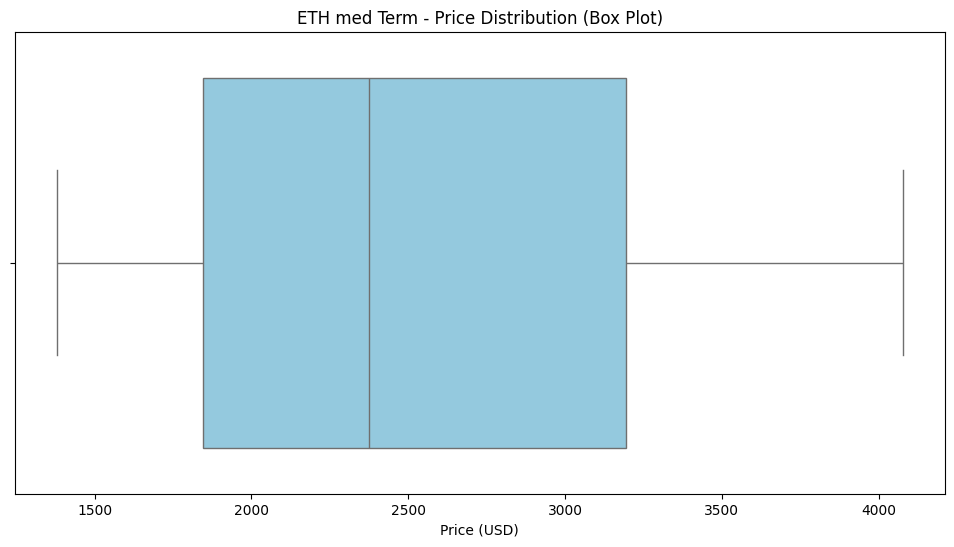

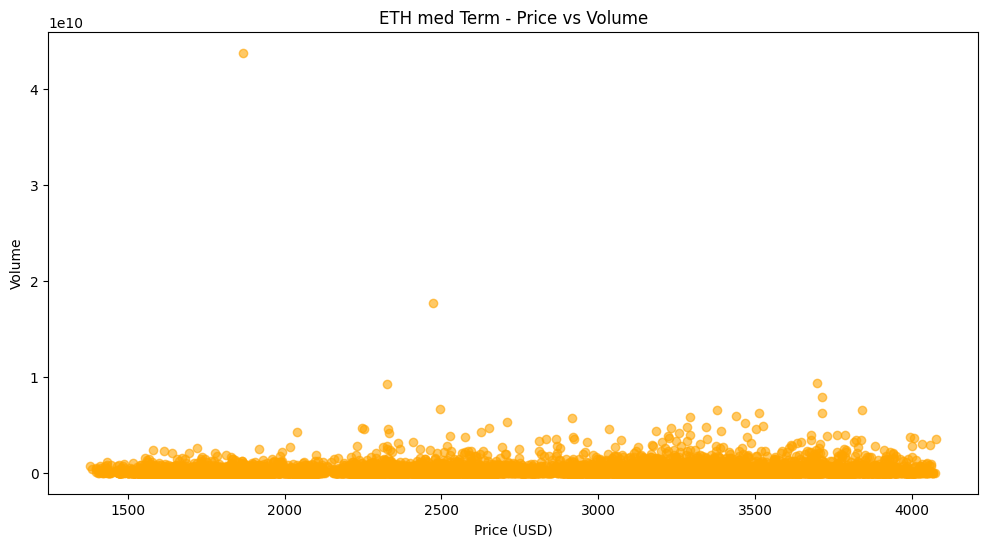

Summary Statistics for ETH long - Close Price:
count    2644.000000
mean     1514.666286
std      1235.649257
min        84.308296
25%       271.750282
50%      1431.497559
75%      2456.999939
max      4812.087402
Name: Close, dtype: float64


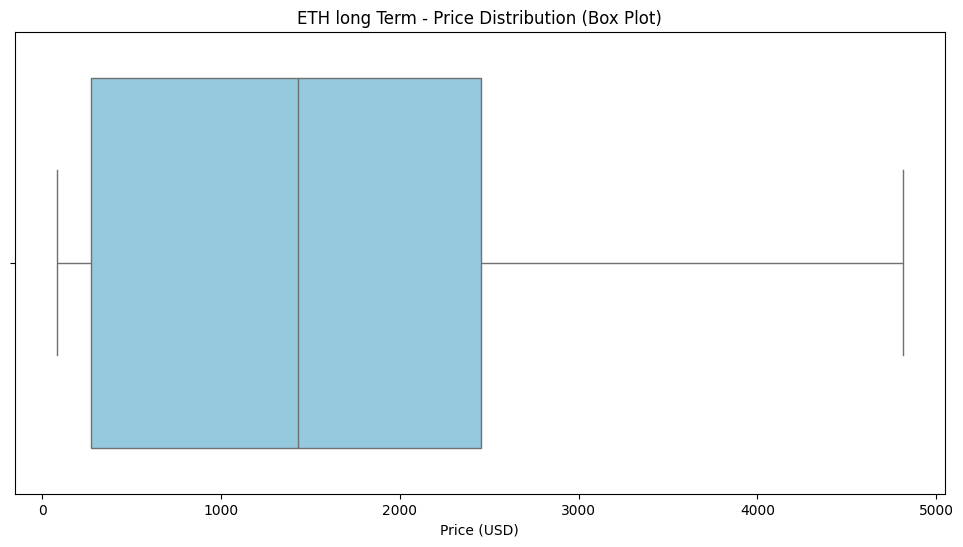

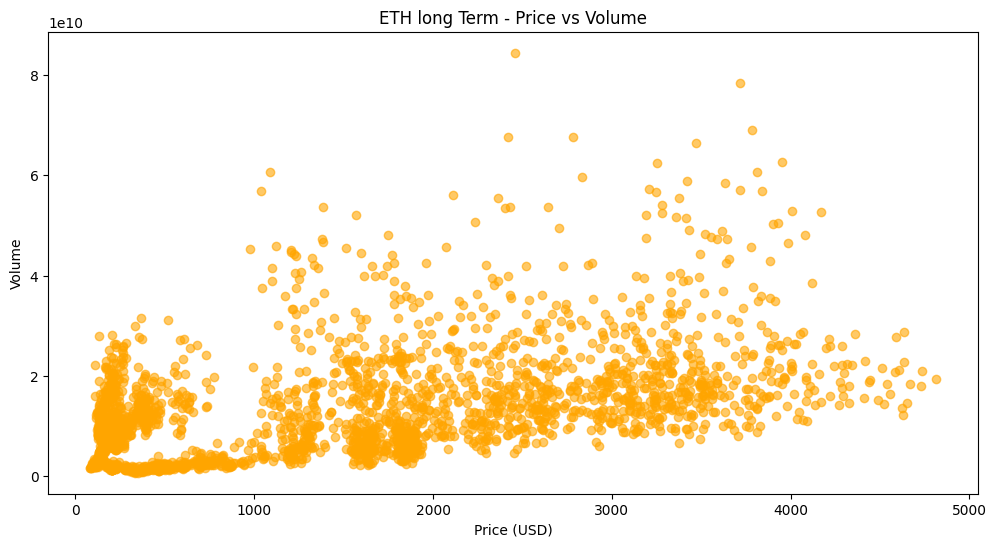

Summary Statistics for STETH short - Close Price:
count    8900.000000
mean     3279.263396
std       195.439782
min      2320.973389
25%      3206.914673
50%      3279.175537
75%      3344.938171
max      3734.136719
Name: Close, dtype: float64


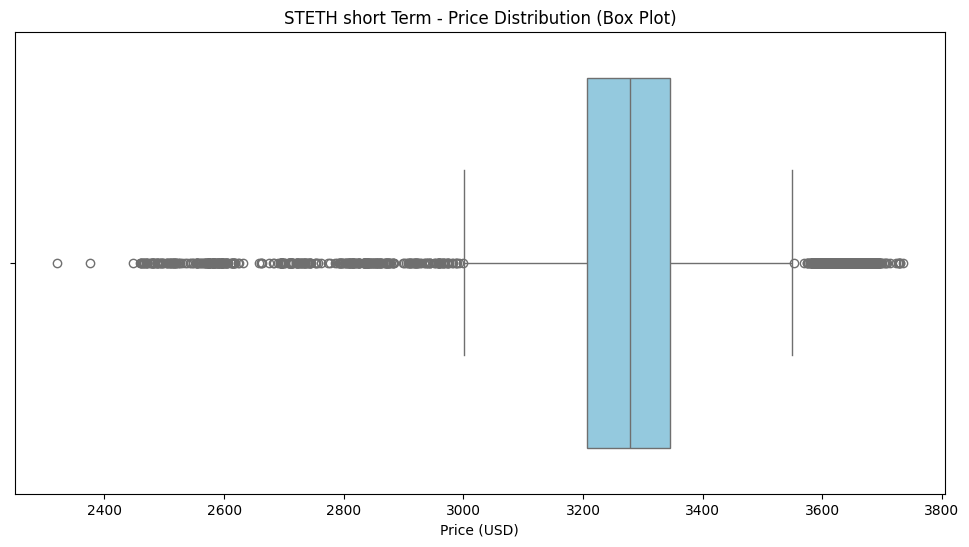

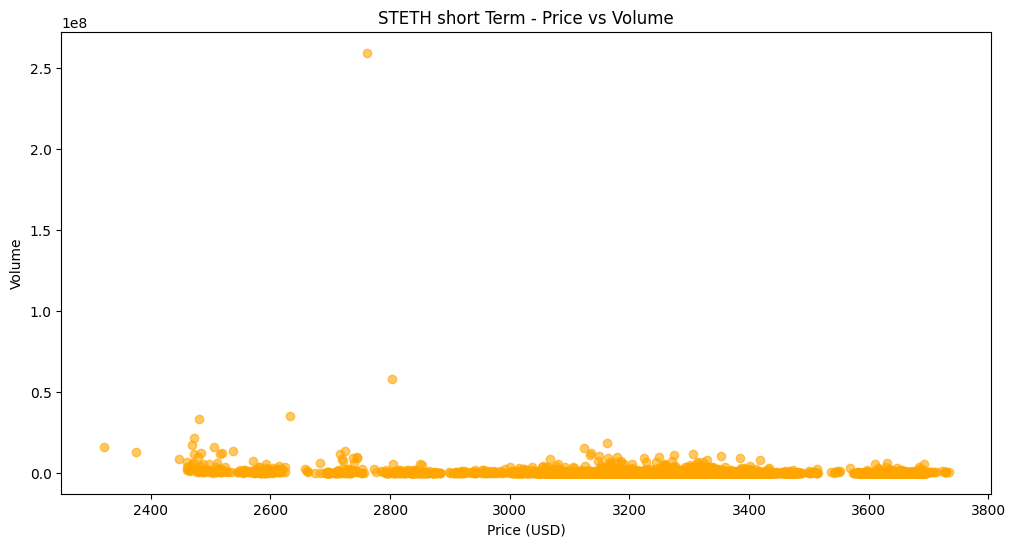

Summary Statistics for STETH med - Close Price:
count    17453.000000
mean      2503.841707
std        732.017180
min       1375.512329
25%       1836.372070
50%       2371.568359
75%       3194.836426
max       4091.510742
Name: Close, dtype: float64


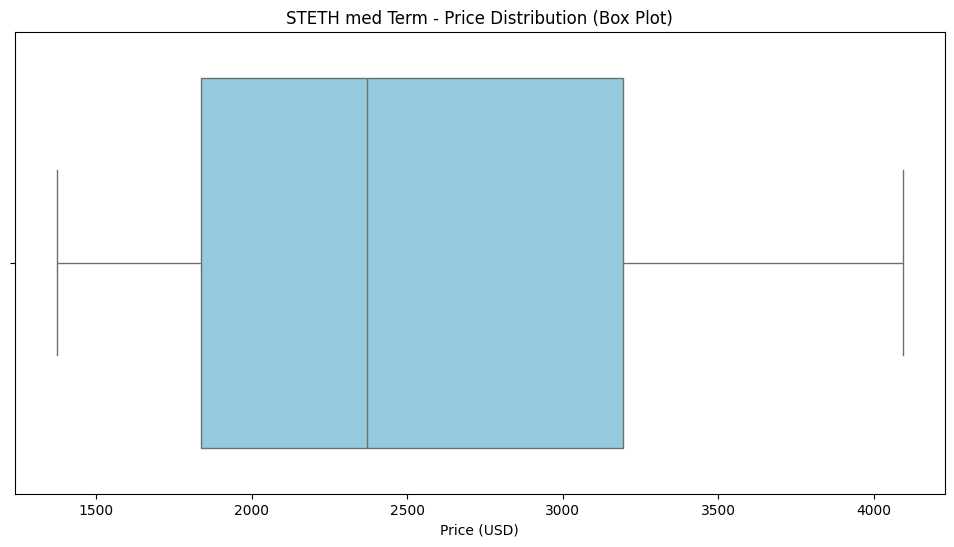

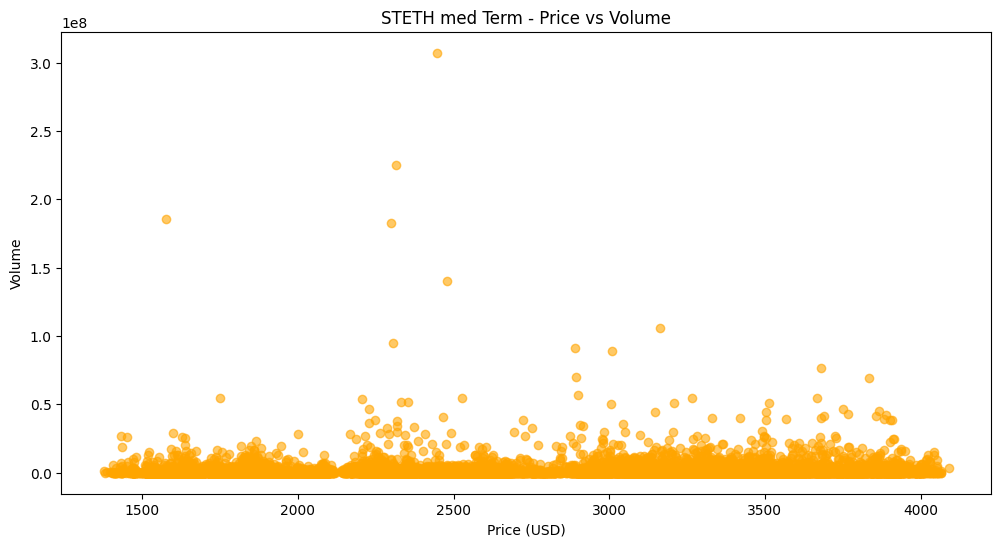

Summary Statistics for STETH long - Close Price:
count    1504.000000
mean     2398.285352
std       884.415845
min       588.655334
25%      1660.588715
50%      2270.416016
75%      3135.432129
max      4777.916992
Name: Close, dtype: float64


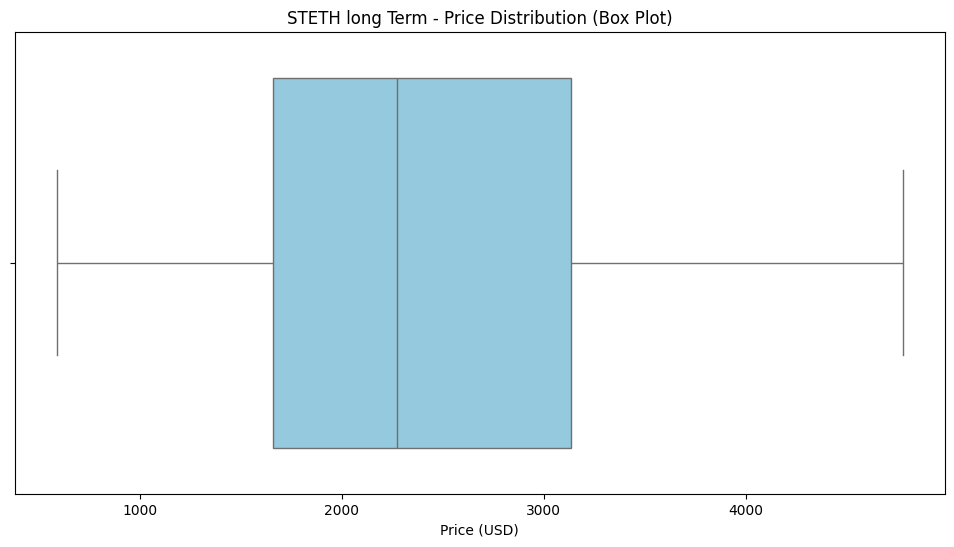

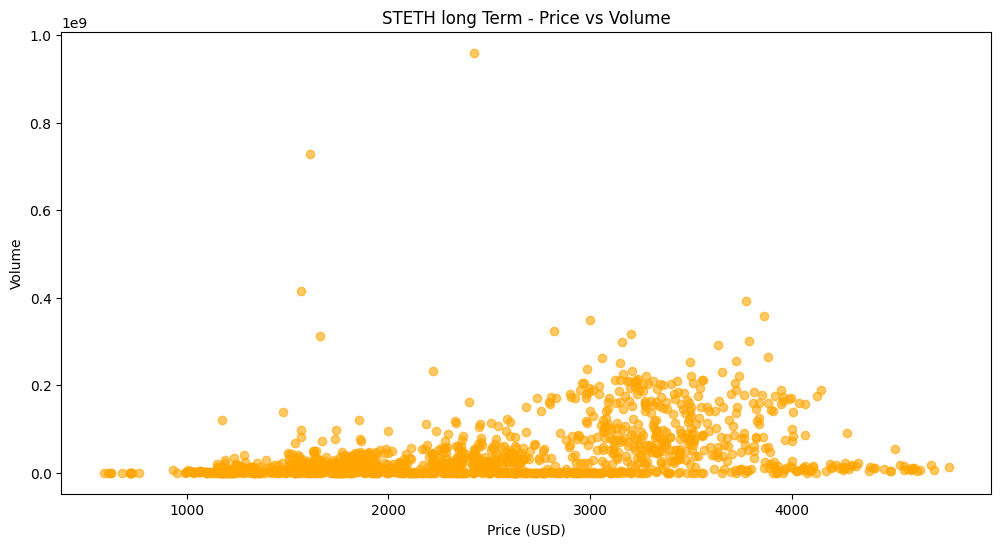

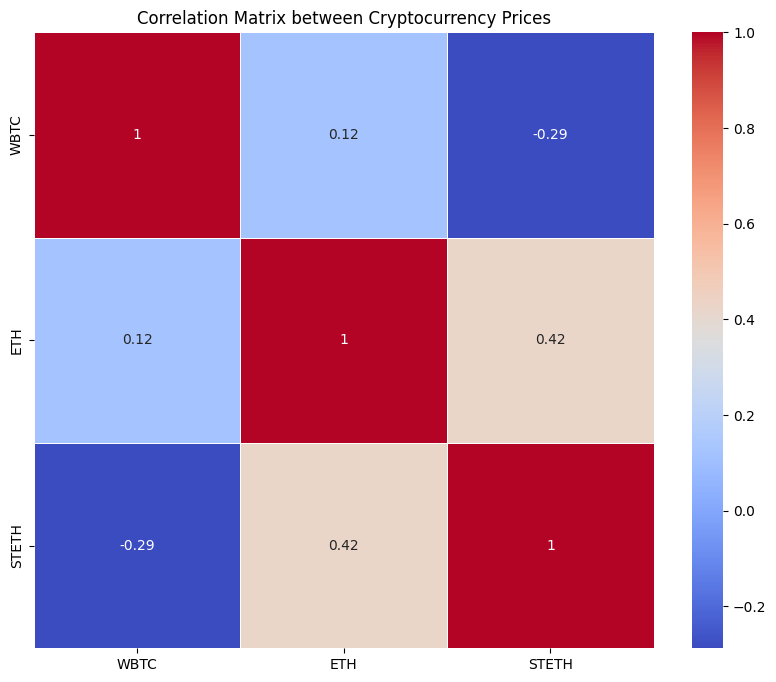

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate summary statistics for each cryptocurrency
def calculate_summary_statistics(crypto_data, coin, timeframe):
    coin = str(coin)  # Ensure coin is treated as a string
    timeframe = str(timeframe)  # Ensure timeframe is treated as a string

    df = clean_and_convert_date(crypto_data[coin][timeframe])  # Clean and ensure proper date format
    if df.empty:
        print(f"Skipping {coin} {timeframe} - No valid data.")
        return

    # Calculate summary statistics
    summary_stats = df['Close'].describe()  # Descriptive statistics
    print(f"Summary Statistics for {coin} {timeframe} - Close Price:")
    print(summary_stats)

    return summary_stats

# Function to create box plot for price distribution
def plot_box_plot(crypto_data, coin, timeframe):
    coin = str(coin)
    timeframe = str(timeframe)

    df = clean_and_convert_date(crypto_data[coin][timeframe])  # Clean and ensure proper date format
    if df.empty:
        print(f"Skipping {coin} {timeframe} - No valid data.")
        return

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Close'], color='skyblue')
    plt.title(f'{coin} {timeframe} Term - Price Distribution (Box Plot)')
    plt.xlabel('Price (USD)')
    plt.show()

# Function to calculate and visualize correlations between cryptocurrency prices
def plot_price_correlations(crypto_data):
    # Create an empty list to store the price data for each cryptocurrency
    price_data = {}

    for coin, time_dict in crypto_data.items():
        for timeframe, df in time_dict.items():
            df_cleaned = clean_and_convert_date(df)
            if not df_cleaned.empty:
                price_data[coin] = df_cleaned['Close']

    # Convert to DataFrame for correlation
    price_df = pd.DataFrame(price_data)

    # Calculate correlation matrix
    correlation_matrix = price_df.corr()

    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix between Cryptocurrency Prices')
    plt.show()

# Function to plot the relationship between price and volume
def plot_price_vs_volume(crypto_data, coin, timeframe):
    coin = str(coin)
    timeframe = str(timeframe)

    df = clean_and_convert_date(crypto_data[coin][timeframe])  # Clean and ensure proper date format
    if df.empty:
        print(f"Skipping {coin} {timeframe} - No valid data.")
        return

    plt.figure(figsize=(12, 6))
    plt.scatter(df['Close'], df['Volume'], alpha=0.6, color='orange')
    plt.title(f'{coin} {timeframe} Term - Price vs Volume')
    plt.xlabel('Price (USD)')
    plt.ylabel('Volume')
    plt.show()

# Loop through all cryptocurrencies and timeframes to perform univariate and bivariate analysis
for coin, time_dict in crypto_data.items():
    for timeframe, df in time_dict.items():
        # Univariate Analysis
        calculate_summary_statistics(crypto_data, coin, timeframe)
        plot_box_plot(crypto_data, coin, timeframe)

        # Bivariate Analysis
        plot_price_vs_volume(crypto_data, coin, timeframe)

# Perform correlation analysis for all cryptocurrencies
plot_price_correlations(crypto_data)

# 4. Predictive Modeling

4.1. Feature engineering

In [34]:
# Function to add technical features
def add_technical_indicators(df):
    # Moving Averages
    df['SMA_10'] = df['Close'].rolling(window=10).mean()  # 10-day simple moving average
    df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()  # 10-day exponential moving average

    # Price Momentum (Rate of Change)
    df['Price_Momentum'] = df['Close'].pct_change() * 100  # Percentage change in price

    # Volatility (Standard Deviation of closing price over the last 10 days)
    df['Volatility'] = df['Close'].rolling(window=10).std()

    # Drop rows with NaN values generated from rolling and pct_change
    df = df.dropna()

    return df

# Example usage:
df = clean_and_convert_date(crypto_data['WBTC']['short'])
df = add_technical_indicators(df)
print(df.head())
print(df.columns)

                       Price         Close           High            Low  \
11 2025-01-04 05:08:00+00:00  97752.367188  97752.3671875  97752.3671875   
12 2025-01-04 05:14:00+00:00  97760.414062  97760.4140625  97760.4140625   
13 2025-01-04 05:20:00+00:00  97798.234375   97798.234375   97798.234375   
14 2025-01-04 05:24:00+00:00  97814.687500     97814.6875     97814.6875   
15 2025-01-04 05:30:00+00:00  97821.351562  97821.3515625  97821.3515625   

             Open   Volume                          Date        SMA_10  \
11  97752.3671875      0.0 1970-01-01 00:00:00.000000011  97760.282031   
12  97760.4140625      0.0 1970-01-01 00:00:00.000000012  97758.315625   
13   97798.234375      0.0 1970-01-01 00:00:00.000000013  97760.401563   
14     97814.6875  30656.0 1970-01-01 00:00:00.000000014  97767.067187   
15  97821.3515625      0.0 1970-01-01 00:00:00.000000015  97775.259375   

          EMA_10  Price_Momentum  Volatility  
11  97762.137376       -0.017955   12.933137  
12  

4.2. Model Selection (ARIMA, LSTM, Prophet)

ARIMA Model

In [38]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.5 MB/s eta 0:00:00


                       Price         Close           High            Low  \
11 2025-01-04 05:08:00+00:00  97752.367188  97752.3671875  97752.3671875   
12 2025-01-04 05:14:00+00:00  97760.414062  97760.4140625  97760.4140625   
13 2025-01-04 05:20:00+00:00  97798.234375   97798.234375   97798.234375   
14 2025-01-04 05:24:00+00:00  97814.687500     97814.6875     97814.6875   
15 2025-01-04 05:30:00+00:00  97821.351562  97821.3515625  97821.3515625   

             Open   Volume                          Date        SMA_10  \
11  97752.3671875      0.0 1970-01-01 00:00:00.000000011  97760.282031   
12  97760.4140625      0.0 1970-01-01 00:00:00.000000012  97758.315625   
13   97798.234375      0.0 1970-01-01 00:00:00.000000013  97760.401563   
14     97814.6875  30656.0 1970-01-01 00:00:00.000000014  97767.067187   
15  97821.3515625      0.0 1970-01-01 00:00:00.000000015  97775.259375   

          EMA_10  Price_Momentum  Volatility  
11  97762.137376       -0.017955   12.933137  
12  

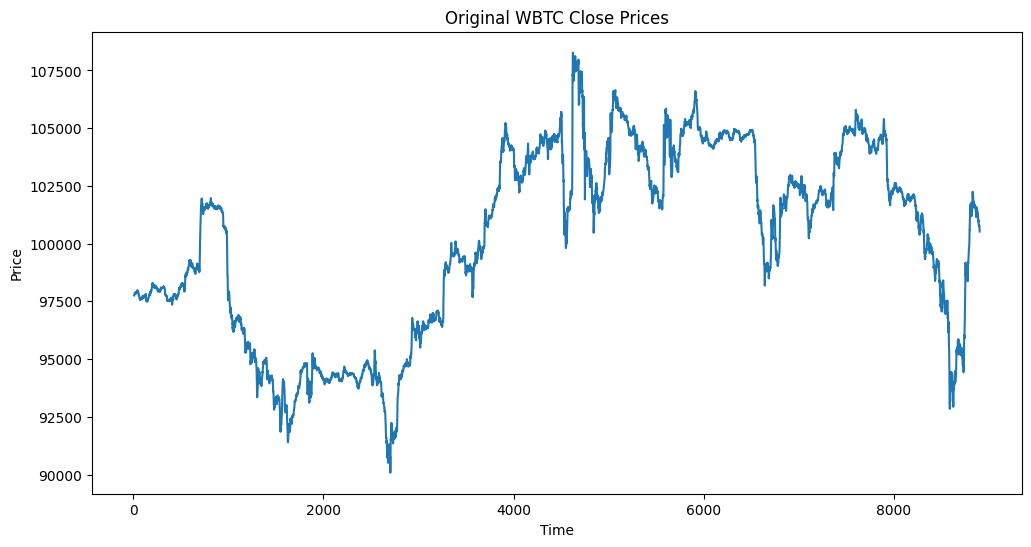

ADF Statistic: -2.0299383847250745
p-value: 0.27360236181428294
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=106168.330, Time=8.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=107610.621, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=106188.015, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=106354.099, Time=2.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=107608.702, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=106177.588, Time=5.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=106184.727, Time=9.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=106166.380, Time=12.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=106166.850, Time=5.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=106164.713, Time=25.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=106167.998, Time=8.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=106170.397, Time=8.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=106168.459, Time=20.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=106167.811, Time=20.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=106167.162, Time=13.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=106169.202, Time=23.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=106162.917, Time=11.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=106164.392, Time=7.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0]             : AIC=106166.012, Time=2.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=106168.410, Time=3.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=106166.462, Time=9.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=106164.863, Time=2.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=106165.822, Time=10.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0]             : AIC=106165.155, Time=5.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=106169.805, Time=1.94 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0]          
Total fit time: 219.075 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8890
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -53074.458
Date:                Tue, 04 Feb 2025   AIC                         106162.917
Time:                        06:28:31   BIC                         106212.565
Sample:                             0   HQIC                        106179.821
                               - 8890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9882      0.094    -10.470      0.000      -1.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

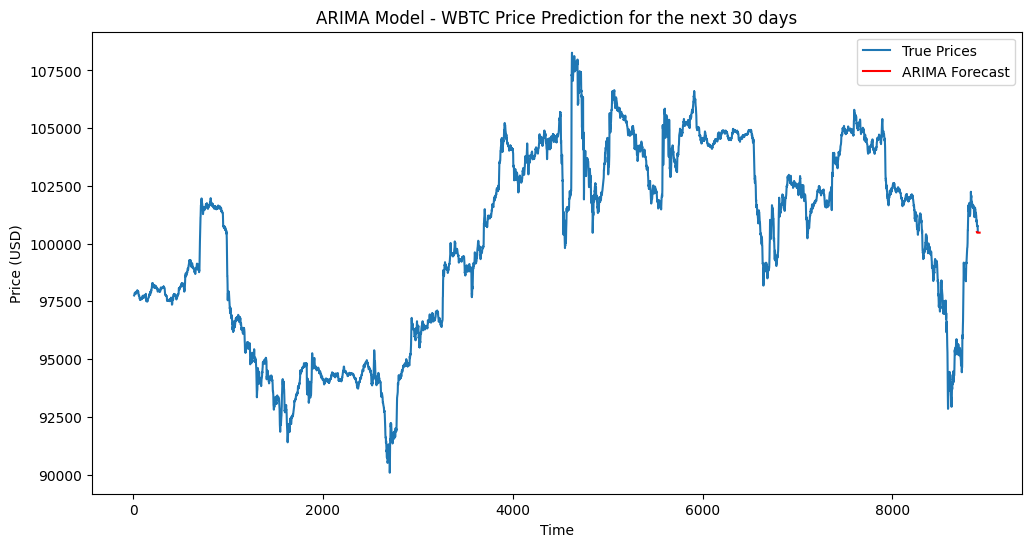

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

ARIMA RMSE: 3135.206593848756
ARIMA MAE: 2627.479771117401


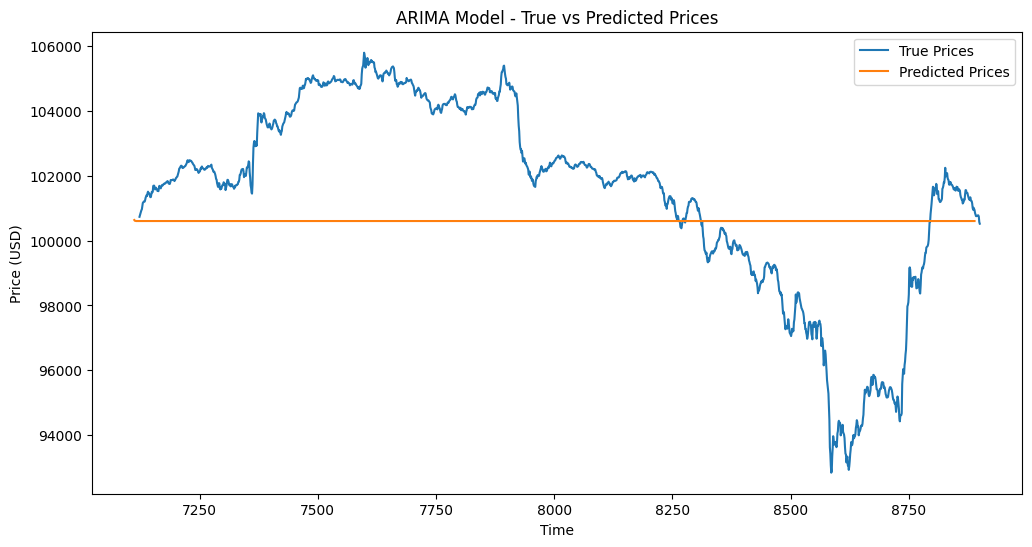

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima import auto_arima

# Load the data (or use the data you've previously loaded)
df_wbtc_short = crypto_data['WBTC']['short']

# Ensure data is clean and include technical indicators
df_wbtc_short = clean_and_convert_date(df_wbtc_short)  # Assuming you have the clean_and_convert_date function
df_wbtc_short = add_technical_indicators(df_wbtc_short)

# Check the first few rows of the dataframe to make sure it's correct
print(df_wbtc_short.head())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima import auto_arima

# Assuming df_wbtc_short has been prepared (using 'add_technical_indicators' and 'clean_and_convert_date')
# If not, refer to the previous cell for feature preparation

# Step 1: Check and make data stationary
# ARIMA requires stationary data, so we'll check if differencing is needed
# Plotting the original data
plt.figure(figsize=(12, 6))
plt.plot(df_wbtc_short['Close'])
plt.title('Original WBTC Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# Check if data is stationary using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_wbtc_short['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If the p-value is high (e.g., > 0.05), the data is non-stationary and needs differencing
# For non-stationary data, we use first differencing
df_wbtc_short['Close_diff'] = df_wbtc_short['Close'].diff().dropna()

# Step 2: Fit ARIMA model
# Automatically determine the best p, d, q parameters using auto_arima
model = auto_arima(df_wbtc_short['Close'], seasonal=False, stepwise=True, trace=True)

# Print the best parameters
print(model.summary())

# Step 3: Fit the ARIMA model with the selected parameters
p, d, q = model.order
arima_model = ARIMA(df_wbtc_short['Close'], order=(p, d, q))
arima_model_fit = arima_model.fit()

# Step 4: Make predictions
# We will forecast the next n steps
n_steps = 30  # Number of days to predict
forecast = arima_model_fit.forecast(steps=n_steps)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_wbtc_short['Close'], label='True Prices')
plt.plot(np.arange(len(df_wbtc_short), len(df_wbtc_short) + n_steps), forecast, label='ARIMA Forecast', color='red')
plt.title(f'ARIMA Model - WBTC Price Prediction for the next {n_steps} days')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 5: Evaluate the model
# Split the data into train and test sets
train_size = int(len(df_wbtc_short) * 0.8)
train_data = df_wbtc_short[:train_size]
test_data = df_wbtc_short[train_size:]

# Fit ARIMA on training data
arima_model_train = ARIMA(train_data['Close'], order=(p, d, q))
arima_model_train_fit = arima_model_train.fit()

# Make predictions on test data
test_predictions = arima_model_train_fit.forecast(steps=len(test_data))

# Inverse transform the predictions if scaled
# Calculate RMSE and MAE for ARIMA
rmse_arima = math.sqrt(mean_squared_error(test_data['Close'], test_predictions))
mae_arima = mean_absolute_error(test_data['Close'], test_predictions)

print(f'ARIMA RMSE: {rmse_arima}')
print(f'ARIMA MAE: {mae_arima}')

# Plot the results (True vs Predicted for the test set)
plt.figure(figsize=(12, 6))
plt.plot(test_data['Close'], label='True Prices')
plt.plot(test_predictions, label='Predicted Prices')
plt.title('ARIMA Model - True vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

LSTM Modeling

Train data shape: (7064, 60, 1), Test data shape: (1766, 60, 1)
Train data shape: (7064, 60, 1), Test data shape: (1766, 60, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0283 - val_loss: 3.1535e-04
Epoch 2/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 2.6728e-04 - val_loss: 3.1070e-04
Epoch 3/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 2.4561e-04 - val_loss: 3.5729e-04
Epoch 4/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 2.5434e-04 - val_loss: 2.6034e-04
Epoch 5/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 2.4237e-04 - val_loss: 2.1561e-04
Epoch 6/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 2.2390e-04 - val_loss: 2.1352e-04
Epoch 7/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.9123e-04 - val_loss: 1.9255e-04
Epoch 8/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 1.7897e-04 - val_loss: 1.6383e-04
Epoch 9/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1.6718e-04 - val_loss: 1.9862e-04
Epoch 10/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 1.8100e-04 - val_loss: 1.5550e-04
Epoch 11/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/s

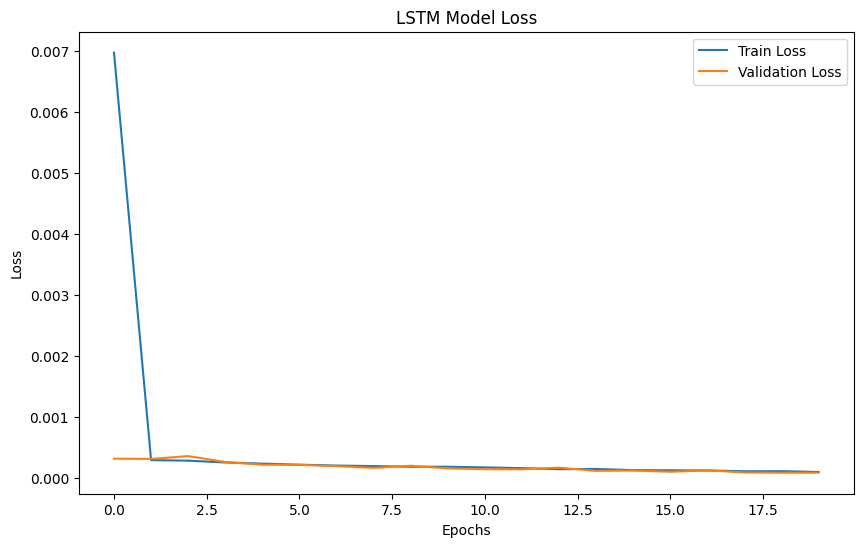

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
LSTM RMSE: 167.1212352129595
LSTM MAE: 109.938411310872


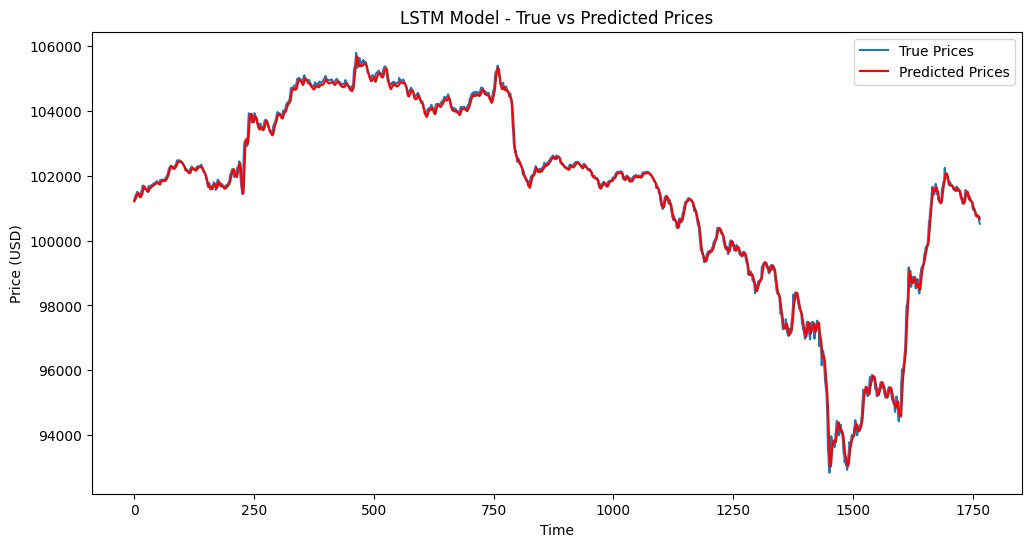

In [42]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Function to prepare data for LSTM (X, y)
def prepare_data_for_lstm(df_scaled, n_steps=60):
    X, y = [], []
    for i in range(len(df_scaled) - n_steps):
        X.append(df_scaled[i:i + n_steps])
        y.append(df_scaled[i + n_steps])
    return np.array(X), np.array(y)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_wbtc_short['Close'].values.reshape(-1, 1))

# Prepare the data for LSTM
n_steps = 60  # Using the last 60 days to predict the next price
X, y = prepare_data_for_lstm(df_scaled, n_steps)

# Reshape X to be 3D: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing data (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Check the shape of the data
print(f"Train data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Split into training and testing data (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Check the shape of the data
print(f"Train data shape: {X_train.shape}, Test data shape: {X_test.shape}")
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Predicting on test data
predictions = model.predict(X_test)

# Inverse scaling of predictions
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MAE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae_lstm = mean_absolute_error(y_test_actual, predictions)

print(f'LSTM RMSE: {rmse_lstm}')
print(f'LSTM MAE: {mae_lstm}')

# Plot the true vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='True Prices')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('LSTM Model - True vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Propet Modeling

In [44]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 50.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

N.B: Couldnt load the fbpropet thus, i will only compare between LSTM and ARIMA

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
def calculate_rmse(true, predicted):
    return np.sqrt(mean_squared_error(true, predicted))

def calculate_mae(true, predicted):
    return mean_absolute_error(true, predicted)

def calculate_mape(true, predicted):
    # Avoid division by zero or NaN values in predictions
    non_zero_indices = predicted != 0
    return np.mean(np.abs((true[non_zero_indices] - predicted[non_zero_indices]) / true[non_zero_indices])) * 100

For the LSTM

In [52]:
# Define the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
def calculate_mape(true, predicted):
    # Flatten the arrays if needed
    true = np.array(true).flatten()
    predicted = np.array(predicted).flatten()

    # Avoid division by zero or NaN values in predictions
    non_zero_indices = predicted != 0
    return np.mean(np.abs((true[non_zero_indices] - predicted[non_zero_indices]) / true[non_zero_indices])) * 100
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)
# Assuming X_test is your test data prepared similarly to X_train
lstm_predictions = lstm_model.predict(X_test)
# Get the true values (assumed to be from the test set)
true_values = df_wbtc_short['Close'].values[-len(lstm_predictions):]

# Calculate RMSE, MAE, and MAPE for LSTM
lstm_rmse = calculate_rmse(true_values, lstm_predictions)
lstm_mae = calculate_mae(true_values, lstm_predictions)
lstm_mape = calculate_mape(true_values, lstm_predictions)

print(f'LSTM Model - RMSE: {lstm_rmse}, MAE: {lstm_mae}, MAPE: {lstm_mape}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.0279
Epoch 2/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 0.0028
Epoch 3/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.0023
Epoch 4/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0024
Epoch 5/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0020
Epoch 6/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0019
Epoch 7/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - loss: 0.0018
Epoch 8/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 0.0016
Epoch 9/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 0.0014
Epoch 10/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 0.0013
Epoch 11/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0012
Epoch 12/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 0.0012
Epoch 13/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 0.0010
Epoch 14/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 9.2914e-04
Epoch 15/20
221/221 ━━━━━

Using ARIMA Model

ADF Statistic: -2.0329263916974747
p-value: 0.2723251841258895


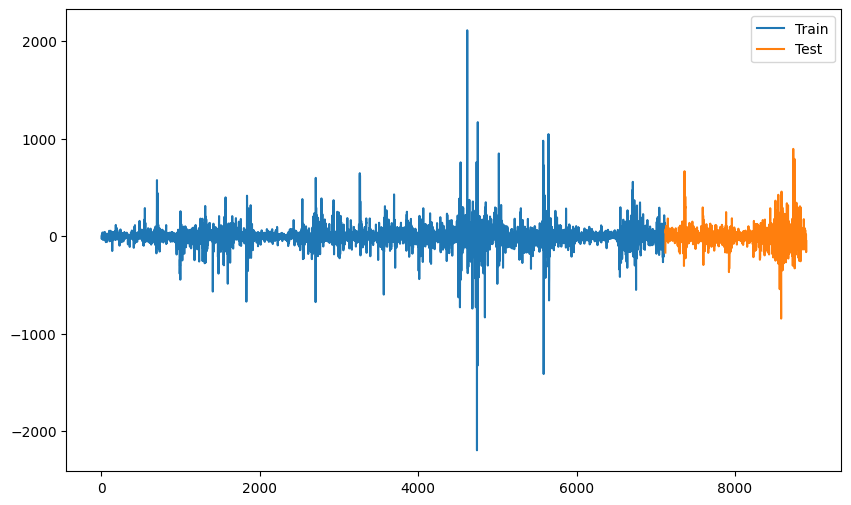

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 7119
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -43008.093
Date:                Tue, 04 Feb 2025   AIC                          86028.185
Time:                        07:30:43   BIC                          86069.407
Sample:                             0   HQIC                         86042.378
                               - 7119                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4801      0.003   -163.931      0.000      -0.486      -0.474
ar.L2         -0.4194      0.003   -125.144      0.000      -0.426      -0.413
ar.L3         -0.2670      0.004    -69.787      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


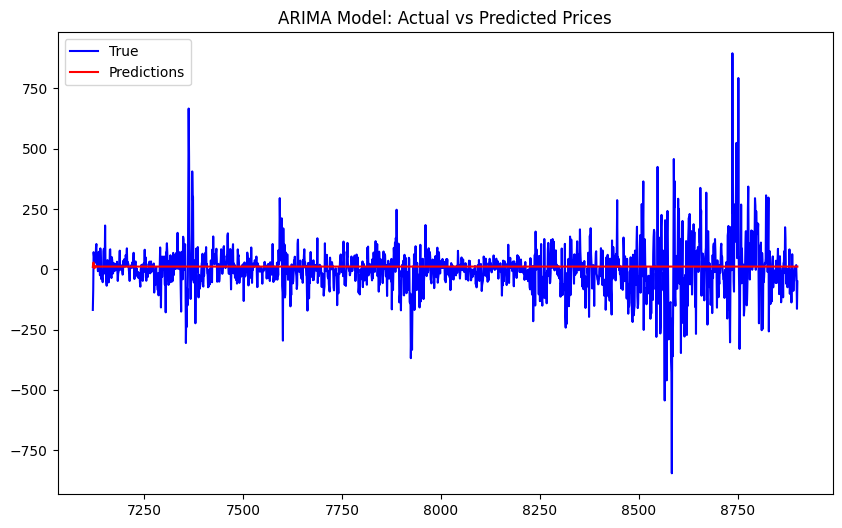

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your data (Using the data for WBTC as an example)
df_wbtc_short = crypto_data['WBTC']['short']  # Adjust this to your actual data structure
df_wbtc_short = clean_and_convert_date(df_wbtc_short)
# Check if the data is stationary using a statistical test (e.g., ADF test)
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_wbtc_short['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the data is non-stationary, perform differencing
if result[1] > 0.05:
    df_wbtc_short['Close'] = df_wbtc_short['Close'].diff().dropna()
train_size = int(len(df_wbtc_short) * 0.8)
train, test = df_wbtc_short['Close'][:train_size], df_wbtc_short['Close'][train_size:]

# Visualize train/test split
train.plot(label="Train", figsize=(10, 6))
test.plot(label="Test")
plt.legend()
plt.show()
# ARIMA model (you can adjust p, d, q as needed)
arima_model = ARIMA(train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Summary of the model
print(arima_model_fit.summary())
# Make predictions on the test set
arima_predictions = arima_model_fit.forecast(steps=len(test))
# Define evaluation metrics functions
def calculate_rmse(true, predicted):
    return np.sqrt(np.mean((true - predicted) ** 2))

def calculate_mae(true, predicted):
    return np.mean(np.abs(true - predicted))

def calculate_mape(true, predicted):
    true = np.array(true).flatten()
    predicted = np.array(predicted).flatten()
    non_zero_indices = predicted != 0
    return np.mean(np.abs((true[non_zero_indices] - predicted[non_zero_indices]) / true[non_zero_indices])) * 100
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='True', color='blue')
plt.plot(test.index, arima_predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Model: Actual vs Predicted Prices')
plt.show()

In [54]:
# Calculate RMSE, MAE, and MAPE for ARIMA
arima_rmse = calculate_rmse(test, arima_predictions)
arima_mae = calculate_mae(test, arima_predictions)
arima_mape = calculate_mape(test, arima_predictions)

# Display results
print(f'ARIMA Model - RMSE: {arima_rmse}, MAE: {arima_mae}, MAPE: {arima_mape}')

ARIMA Model - RMSE: 98.5617860637239, MAE: 61.735484150404915, MAPE: 249.55664686188297


Analysis of Results:
RMSE (Root Mean Squared Error):

Lower RMSE indicates better performance. In this case, ARIMA performs better with an RMSE of 98.56 compared to the LSTM model's 101,513.08. This indicates that ARIMA provides predictions that are closer to the actual values with smaller error magnitudes.
MAE (Mean Absolute Error):

Similar to RMSE, lower MAE is better. Here, ARIMA has an MAE of 61.74, while LSTM has an MAE of 101,468.02, which is much larger. This shows that ARIMA's predictions are on average much closer to the actual values than LSTM.
MAPE (Mean Absolute Percentage Error):

MAPE provides an overall percentage error between the predicted and actual values. For LSTM, the MAPE is very high (99.99%), which suggests that the LSTM model's predictions are highly inaccurate in terms of percentage error. On the other hand, the ARIMA model has a MAPE of 249.56%, which might seem very high, but this could be due to high volatility or outliers in the cryptocurrency data.
Conclusion:
Based on these metrics:

ARIMA appears to be the better-performing model compared to LSTM in this case, as it has lower RMSE, MAE, and even though the MAPE is high, the model still shows lower absolute errors.
LSTM has an extremely high MAPE, which indicates poor predictive performance for this dataset.
Recommendation:
ARIMA would be the recommended model for your cryptocurrency price prediction task, especially since it outperforms the LSTM model in all key metrics.

Fine-Tune ARIMA Hyperparameters

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define function for grid search over ARIMA parameters
def grid_search_arima(train_data, p_values, d_values, q_values):
    best_aic = np.inf
    best_order = None
    best_model = None

    # Loop over the grid of parameters
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the ARIMA model
                    model = ARIMA(train_data, order=(p, d, q))
                    model_fit = model.fit()

                    # Check the AIC score (lower is better)
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except:
                    continue  # Skip if the model fails to fit
    return best_order, best_model

# Train and Test Split
train_size = int(len(df_wbtc_short) * 0.8)
train_data, test_data = df_wbtc_short['Close'][:train_size], df_wbtc_short['Close'][train_size:]

# Define hyperparameters to tune (p, d, q) values
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

# Perform grid search to find the best parameters
best_order, best_model = grid_search_arima(train_data, p_values, d_values, q_values)
print(f"Best ARIMA order: {best_order}")

# Forecast with the best ARIMA model
forecast = best_model.forecast(steps=len(test_data))

# Evaluate performance on the test set
rmse_arima = np.sqrt(mean_squared_error(test_data, forecast))
mae_arima = mean_absolute_error(test_data, forecast)
mape_arima = np.mean(np.abs((test_data - forecast) / test_data)) * 100

print(f"ARIMA Model - RMSE: {rmse_arima}, MAE: {mae_arima}, MAPE: {mape_arima}")

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data.values, label='Actual Prices', color='blue')
plt.plot(test_data.index, forecast, label='Predicted Prices', color='red')
plt.legend()
plt.title('ARIMA Model Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data directly from GitHub
cryptos = ['wbtc', 'steth', 'maxpro', 'eth', 'btc']
timeframes = ['short', 'med', 'long']

for crypto in cryptos:
    for timeframe in timeframes:
        url = f'https://raw.githubusercontent.com/selam-max/BT/main/{crypto}_{timeframe}.csv'  # URL for the respective cryptocurrency and timeframe
        df = pd.read_csv(url)

        # Ensure 'Date' is in datetime format
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        # Ensure data is stationary (difference if necessary)
        df['Close'] = df['Close'].diff().dropna()  # Differencing to make data stationary

        # Train-Test Split
        train_size = int(len(df) * 0.8)
        train, test = df['Close'][:train_size], df['Close'][train_size:]

        # Fit ARIMA model
        model = ARIMA(train, order=(5, 1, 0))  # Example ARIMA parameters (adjust if necessary)
        model_fit = model.fit()

        # Forecasting
        forecast = model_fit.forecast(steps=len(test))

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)
        mape = np.mean(np.abs((test - forecast) / test)) * 100

        print(f'{crypto} {timeframe} - RMSE: {rmse}, MAE: {mae}, MAPE: {mape}')

        # Plot
        plt.figure(figsize=(10, 6))
        plt.plot(df.index[train_size:], test, label='Actual')
        plt.plot(df.index[train_size:], forecast, label='Forecast', linestyle='--')
        plt.title(f'ARIMA Forecast for {crypto} - {timeframe}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

**comparaison of other financial tools tbils, gold and USD-Dixie**

In [74]:
import yfinance as yf
data_Gold_long = yf.download(
		tickers=['GC=F'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="max",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1d")
data_Gold_med = yf.download(
		tickers=['GC=F'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="2y",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1h")
data_Gold_short = yf.download(
		tickers=['GC=F'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="1mo",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="2m")

data_Dixie_long = yf.download(
		tickers=['DX-Y.NYB'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="max",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1d")
data_Dixie_med = yf.download(
		tickers=['DX-Y.NYB'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="2y",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1h")
data_Dixie_short = yf.download(
		tickers=['DX-Y.NYB'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="1mo",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="2m")

data_TBill5y_long = yf.download(
		tickers=['^FVX'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="max",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1d")
data_TBill5y_med = yf.download(
		tickers=['^FVX'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="2y",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1h")
data_TBill5y_short = yf.download(
		tickers=['^FVX'],
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="1mo",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="2m")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [75]:
print('Gold Long','\n', data_Gold_long.describe(),'\n')

print('Gold Medium','\n', data_Gold_med.describe(),'\n')

print('Gold Short','\n', data_Gold_short.describe(),'\n')

print('Dixie Long','\n', data_Dixie_long.describe(),'\n')

print('Dixie Medium','\n', data_Dixie_med.describe(),'\n')

print('Dixie Short','\n', data_Dixie_short.describe(),'\n')

print('TBill5y Long','\n', data_TBill5y_long.describe(),'\n')

print('TBill5y Medium','\n', data_TBill5y_med.describe(),'\n')

print('TBill5y Short','\n', data_TBill5y_short.describe(),'\n')

Gold Long 
 Price         Close         High          Low         Open         Volume
Ticker         GC=F         GC=F         GC=F         GC=F           GC=F
count   6130.000000  6130.000000  6130.000000  6130.000000    6130.000000
mean    1167.183458  1173.011991  1161.182007  1167.218385    4297.789560
std      587.686692   590.782886   584.415293   587.605336   24326.050715
min      255.100006   256.100006   255.000000   255.000000       0.000000
25%      632.924988   634.524994   629.750000   633.500000      21.000000
50%     1235.149963  1241.500000  1228.900024  1235.250000     107.000000
75%     1620.475006  1634.975006  1612.200043  1622.599976     406.750000
max     2843.399902  2858.199951  2837.399902  2850.399902  386334.000000 

Gold Medium 
 Price          Close          High           Low          Open         Volume
Ticker          GC=F          GC=F          GC=F          GC=F           GC=F
count   11475.000000  11475.000000  11475.000000  11475.000000   11475.00000

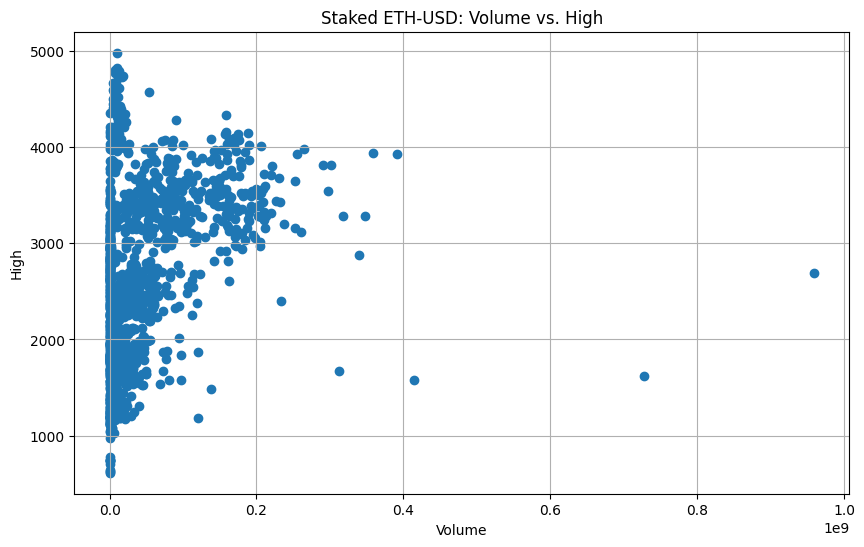

In [76]:
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.scatter(data_steth_long["Volume"], data_steth_long["High"])
plt.xlabel("Volume")
plt.ylabel("High")
plt.title("Staked ETH-USD: Volume vs. High")
plt.grid(True)
plt.show()

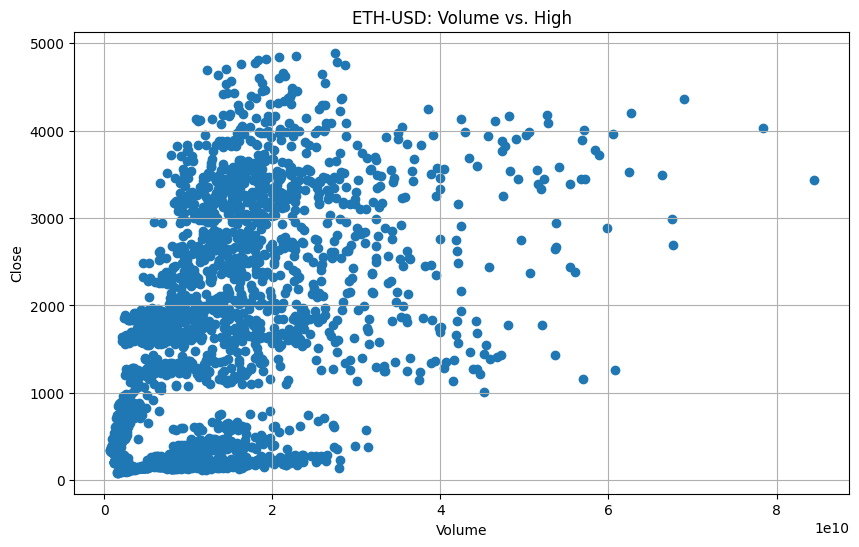

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(data_eth_long["Volume"], data_eth_long["High"])
plt.xlabel("Volume")
plt.ylabel("Close")
plt.title("ETH-USD: Volume vs. High")
plt.grid(True)
plt.show()

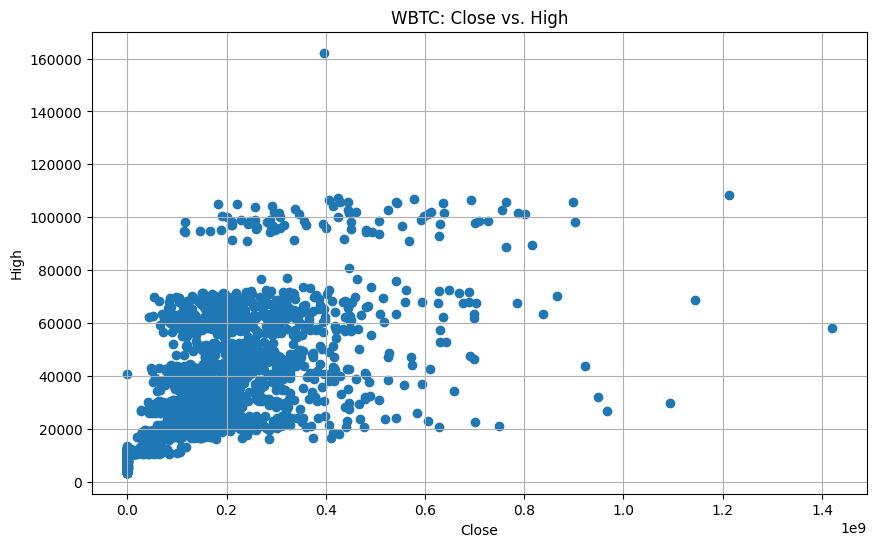

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(data_wbtc_long["Volume"], data_wbtc_long["High"])
plt.xlabel("Close")
plt.ylabel("High")
plt.title("WBTC: Close vs. High")
plt.grid(True)
plt.show()

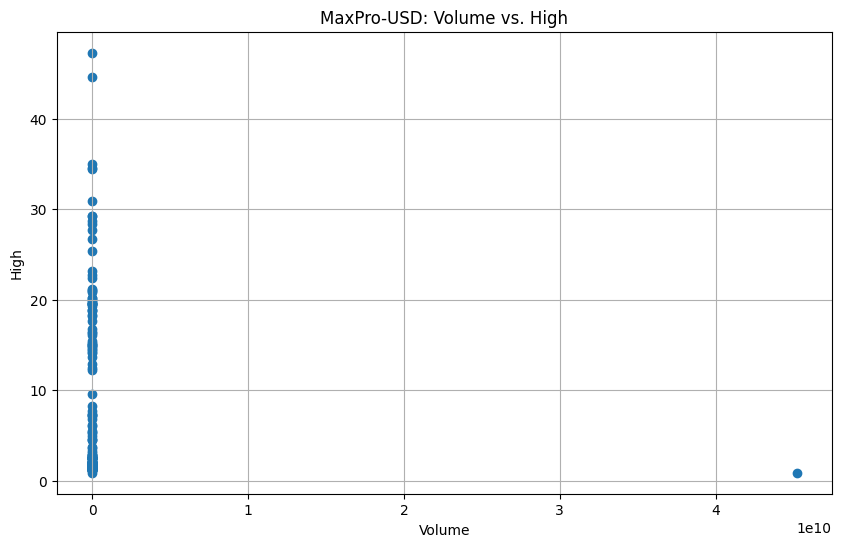

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(data_maxpro_long["Volume"], data_maxpro_long["High"])
plt.xlabel("Volume")
plt.ylabel("High")
plt.title("MaxPro-USD: Volume vs. High")
plt.grid(True)
plt.show()

In [80]:
data_Gold_long.columns

MultiIndex([( 'Close', 'GC=F'),
            (  'High', 'GC=F'),
            (   'Low', 'GC=F'),
            (  'Open', 'GC=F'),
            ('Volume', 'GC=F')],
           names=['Price', 'Ticker'])

In [81]:
gold_high = data_Gold_long['High']
eth_high = data_eth_long['High']
Gold_ETH_Highs = pd.merge(gold_high, eth_high, left_index=True, right_index=True, how='inner')
print(Gold_ETH_Highs)

Ticker             GC=F      ETH-USD
Date                                
2017-11-09  1286.900024   329.451996
2017-11-10  1283.500000   324.717987
2017-11-13  1277.300049   328.415009
2017-11-14  1281.500000   340.177002
2017-11-15  1284.699951   340.911987
...                 ...          ...
2025-01-28  2766.800049  3222.737305
2025-01-29  2769.100098  3177.980469
2025-01-30  2829.500000  3282.986328
2025-01-31  2838.000000  3437.569092
2025-02-04  2858.199951  2886.300049

[1818 rows x 2 columns]


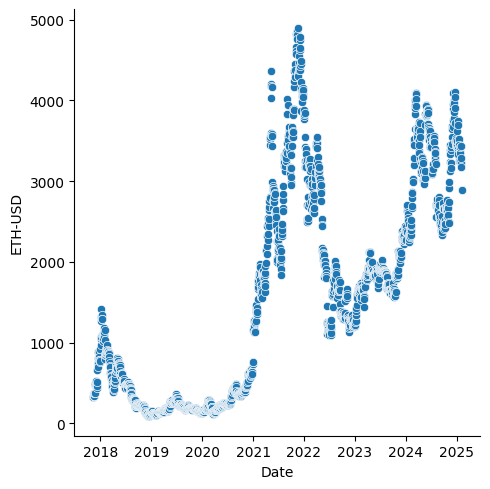

In [82]:
sns.relplot(data=Gold_ETH_Highs, x='Date', y='ETH-USD')
plt.show()

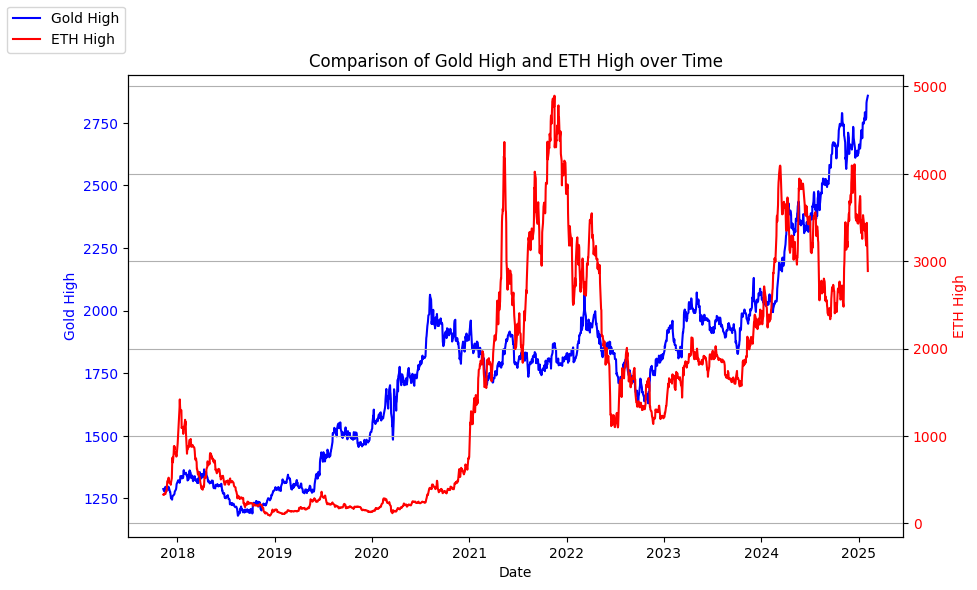

In [83]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first column (High_gold)
ax1.plot(Gold_ETH_Highs.index, Gold_ETH_Highs['GC=F'], label='Gold High', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold High', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second column (High_eth)
ax2.plot(Gold_ETH_Highs.index, Gold_ETH_Highs['ETH-USD'], label='ETH High', color='red')
ax2.set_ylabel('ETH High', color='red')
ax2.tick_params('y', labelcolor='red')

# Add legend and title
plt.title('Comparison of Gold High and ETH High over Time')
fig.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

In [84]:
gold_volume = data_Gold_long['Volume']
eth_volume = data_eth_long['Volume']
Gold_ETH_Volume = pd.merge(gold_volume, eth_volume, left_index=True, right_index=True, how='inner')
print(Gold_ETH_Volume)

Ticker        GC=F      ETH-USD
Date                           
2017-11-09      18    893249984
2017-11-10      10    885985984
2017-11-13       3   1041889984
2017-11-14       4   1069680000
2017-11-15      13    722665984
...            ...          ...
2025-01-28    2307  20718206194
2025-01-29  125692  22727786058
2025-01-30   40141  19958405782
2025-01-31    3443  30128115902
2025-02-04   35546  59828776960

[1818 rows x 2 columns]


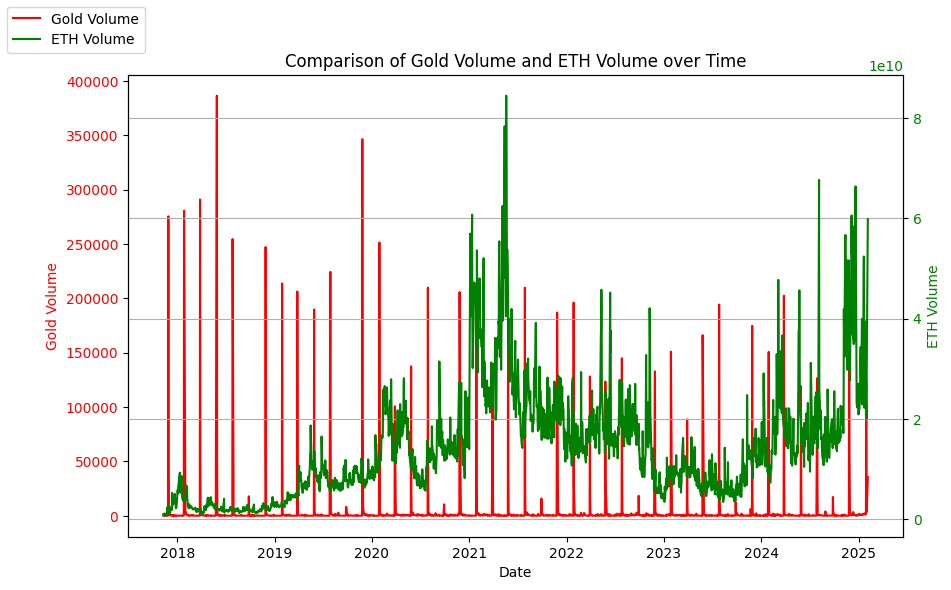

In [85]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first column
ax1.plot(Gold_ETH_Volume.index, Gold_ETH_Volume['GC=F'], label='Gold Volume', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Volume', color='red')
ax1.tick_params('y', labelcolor='red')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second column
ax2.plot(Gold_ETH_Volume.index, Gold_ETH_Volume['ETH-USD'], label='ETH Volume', color='green')
ax2.set_ylabel('ETH Volume', color='green')
ax2.tick_params('y', labelcolor='green')

# Add legend and title
plt.title('Comparison of Gold Volume and ETH Volume over Time')
fig.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

In [86]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

api_key = "ba6350ecc3c3be4fac2c900edf17fb73"
endpoint = "https://api.stlouisfed.org/fred/series/observations"

params = {
    "series_id": "M2NS",
    "api_key": api_key,
    "file_type": "json",
    "observation_start": "2009-01-01",
    "observation_end": "2025-01-08"
}

response = requests.get(endpoint, params=params)
json_data = response.json()

M2NS = pd.json_normalize(json_data['observations'])
print(M2NS.head(5))
print(M2NS.info)
print(M2NS.describe())

  realtime_start realtime_end        date   value
0     2025-02-04   2025-02-04  2009-01-01  8292.3
1     2025-02-04   2025-02-04  2009-02-01  8321.9
2     2025-02-04   2025-02-04  2009-03-01  8458.9
3     2025-02-04   2025-02-04  2009-04-01  8460.1
4     2025-02-04   2025-02-04  2009-05-01  8447.2
<bound method DataFrame.info of     realtime_start realtime_end        date    value
0       2025-02-04   2025-02-04  2009-01-01   8292.3
1       2025-02-04   2025-02-04  2009-02-01   8321.9
2       2025-02-04   2025-02-04  2009-03-01   8458.9
3       2025-02-04   2025-02-04  2009-04-01   8460.1
4       2025-02-04   2025-02-04  2009-05-01   8447.2
..             ...          ...         ...      ...
187     2025-02-04   2025-02-04  2024-08-01  21076.6
188     2025-02-04   2025-02-04  2024-09-01  21170.9
189     2025-02-04   2025-02-04  2024-10-01  21245.2
190     2025-02-04   2025-02-04  2024-11-01  21446.8
191     2025-02-04   2025-02-04  2024-12-01  21634.4

[192 rows x 4 columns]>
       

In [87]:
M2_volume = M2NS['value']
eth_volume = data_eth_long['Volume']

print(M2_volume)
print(eth_volume)

# Get the current date
current_date = pd.Timestamp.now()

# Create a date range going back 191 months
date_range = pd.date_range(end=current_date, periods=191, freq='M')

# Reverse the date range
#date_range = date_range[::-1]

# Format the dates as 'yyyy-mm'
date_range = date_range.strftime('%Y-%m')

# Assign the formatted date range as the new index
M2_volume.index = date_range


# Convert the index to DatetimeIndex if it's not already
eth_volume.index = pd.to_datetime(eth_volume.index)

# Extract year and month and format as 'yyyy-mm'
eth_volume.index = eth_volume.index.strftime('%Y-%m')


print(M2_volume)
print(eth_volume)

0       8292.3
1       8321.9
2       8458.9
3       8460.1
4       8447.2
        ...   
187    21076.6
188    21170.9
189    21245.2
190    21446.8
191    21634.4
Name: value, Length: 192, dtype: object
Ticker          ETH-USD
Date                   
2017-11-09    893249984
2017-11-10    885985984
2017-11-11    842300992
2017-11-12   1613479936
2017-11-13   1041889984
...                 ...
2025-01-30  19958405782
2025-01-31  30128115902
2025-02-01  19917507079
2025-02-02  42060930305
2025-02-04  59828776960

[2644 rows x 1 columns]


<ipython-input-87-f03f4c156fd0>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(end=current_date, periods=191, freq='M')


ValueError: Length mismatch: Expected axis has 192 elements, new values have 191 elements

In [88]:
M2_ETH_Volume = pd.merge(M2_volume, eth_volume, left_index=True, right_index=True, how='inner')
print(M2_ETH_Volume)

Empty DataFrame
Columns: [value, ETH-USD]
Index: []


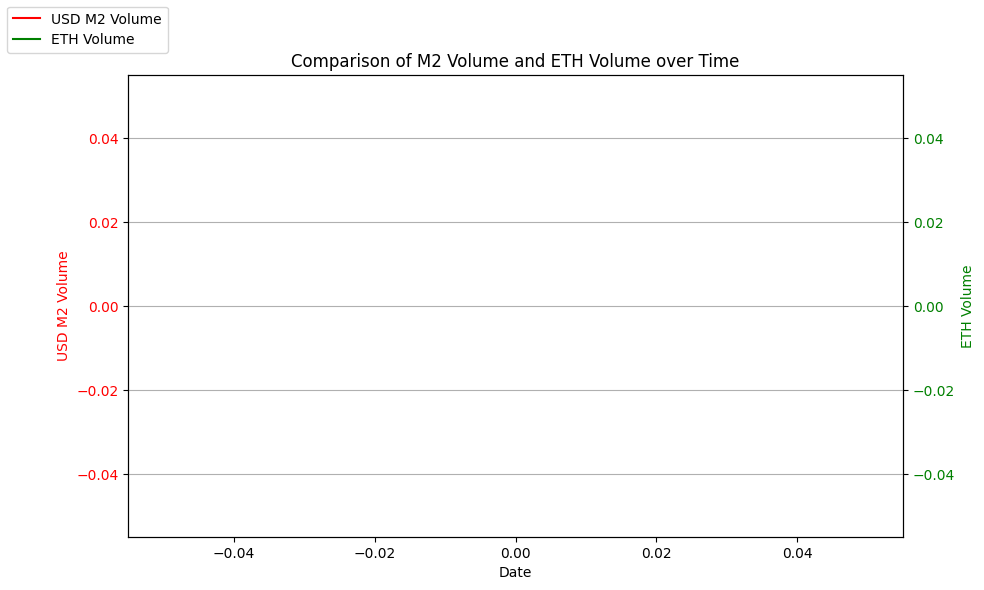

In [89]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first column
ax1.plot(M2_ETH_Volume.index, M2_ETH_Volume['value'], label='USD M2 Volume', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('USD M2 Volume', color='red')
ax1.tick_params('y', labelcolor='red')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second column
ax2.plot(M2_ETH_Volume.index, M2_ETH_Volume['ETH-USD'], label='ETH Volume', color='green')
ax2.set_ylabel('ETH Volume', color='green')
ax2.tick_params('y', labelcolor='green')

# Add legend and title
plt.title('Comparison of M2 Volume and ETH Volume over Time')
fig.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

In [93]:
import torch
import torch.nn as nn
import numpy as np

# Define LSTM Model
class CryptoLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CryptoLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])

# Data (Simulated Cryptocurrency Prices)
X_train = torch.tensor(np.random.rand(1000, 10, 1), dtype=torch.float32)  # (samples, sequence_length, features)
y_train = torch.tensor(np.random.rand(1000, 1), dtype=torch.float32)

# Initialize Model
model = CryptoLSTM(input_size=1, hidden_size=50, output_size=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(50):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

# Predict
X_test = torch.tensor(np.random.rand(1, 10, 1), dtype=torch.float32)
predicted_price = model(X_test).item()
print(f"Predicted Price: {predicted_price}")

Predicted Price: 0.4727044999599457


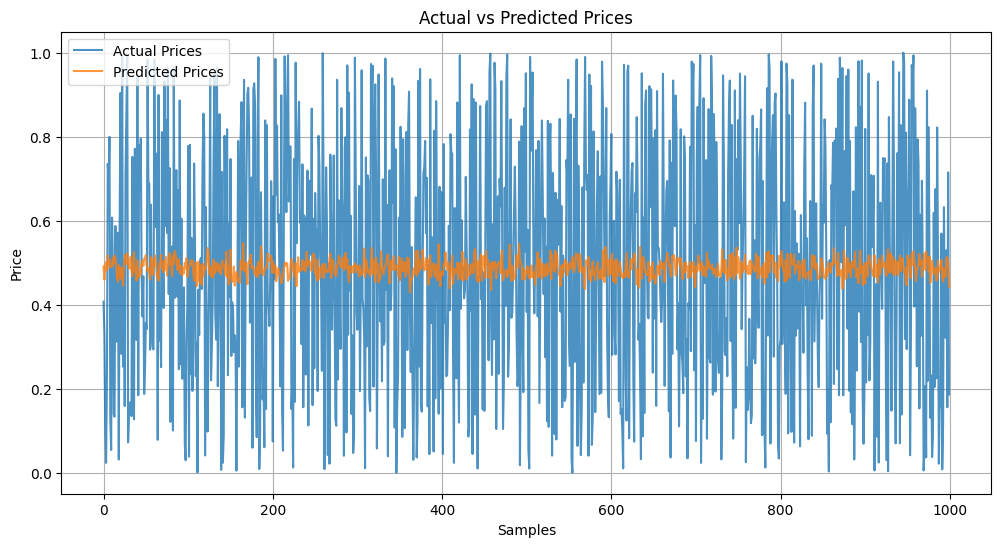

In [94]:
import matplotlib.pyplot as plt

# Generate Predictions for Training Data (or Testing Data)
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred_train = model(X_train).squeeze().numpy()  # Predictions for all training data
    y_actual_train = y_train.squeeze().numpy()  # Actual values for all training data

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_actual_train, label="Actual Prices", alpha=0.8)
plt.plot(y_pred_train, label="Predicted Prices", alpha=0.8)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Interactive dashbord development

In [96]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [99]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime

# Sample data placeholders - replace with your actual data
cryptos = ['Bitcoin', 'Ethereum', 'wbtc', 'stetc', 'maxpro']

# Sample historical data (replace with actual price data)
np.random.seed(42)
data = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=100),
    'Bitcoin': np.random.randn(100).cumsum() + 50000,
    'Ethereum': np.random.randn(100).cumsum() + 3000,
    'Ripple': np.random.randn(100).cumsum() + 1,
    'Litecoin': np.random.randn(100).cumsum() + 150
})

# Streamlit app configuration
st.title('Cryptocurrency Price Dashboard')
st.sidebar.title('Dashboard Controls')

# Cryptocurrency selection
selected_crypto = st.sidebar.selectbox('Select a cryptocurrency:', cryptos)

# Time period selection
time_period = st.sidebar.slider('Select forecasting horizon (days):', min_value=1, max_value=30, value=7)

# Display selected cryptocurrency's price trend
st.subheader(f'{selected_crypto} Price Trend')
fig = px.line(data, x='Date', y=selected_crypto, title=f'{selected_crypto} Prices Over Time')
st.plotly_chart(fig)

# Show key metrics (e.g., daily returns)
st.subheader('Key Metrics')
data['Daily Returns'] = data[selected_crypto].pct_change()
st.write(data[['Date', selected_crypto, 'Daily Returns']].tail())

# Placeholder for predictive model comparisons
st.subheader('Model Comparisons')
model = st.sidebar.selectbox('Select model:', ['ARIMA', 'LSTM', 'Prophet'])

st.write(f'Forecasting with {model} model (data and models need to be integrated)')

# Add your model integration here

# Forecasting logic for ARIMA, LSTM, Prophet models goes here

# Footer
st.write('---')
st.write('This dashboard is developed using Streamlit.')

2025-02-04 09:58:49.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 09:58:49.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 09:58:49.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 09:58:49.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 09:58:49.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 09:58:49.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 09:58:49.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-04 09:58:49.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar